In [ ]:
# ! git clone https://github.com/tianyu0207/RTFM.git

Cloning into 'RTFM'...
remote: Enumerating objects: 540, done.
remote: Counting objects: 100% (445/445), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 540 (delta 413), reused 419 (delta 401), pack-reused 95
Receiving objects: 100% (540/540), 103.18 KiB | 1.69 MiB/s, done.
Resolving deltas: 100% (450/450), done.


# [ucf-crime] train, test - RTFM

- colab에서 실행 가능

In [ ]:
from google.colab import drive
import os
import glob
import pickle

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[4]dataset.zip' -d '/content/npy'
!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[4]dataset_ucf.zip' -d '/content/npy'
!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[3]RTFM_ucf.zip' -d '/content/RTFM'

In [ ]:
# https://github.com/fossasia/visdom/issues/419

! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 6006 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 0.397s


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.0.0       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.0.0   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰────────────────────────────────────────────────────────────────╯



In [ ]:
# https://stackoverflow.com/questions/50639768/colaboratory-virtual-instances-ip-range
!curl ipecho.net/plain

In [ ]:
# train list

path_dir = '/content/npy/dataset/train_npy'
train_file_list = glob.glob(path_dir+'/*')

# normal만 뒤로 빼기
normal_list = []
for each in train_file_list:
  if 'Normal' in each:
    normal_list.append(each)

train_file_list_temp = [each for each in train_file_list if each not in normal_list]
train_file_list = train_file_list_temp
train_file_list = train_file_list + normal_list

print(len(train_file_list))
print(train_file_list[237])
print(train_file_list[236])
print('---')
train_file_list

387
/content/npy/dataset/train_npy/Normal_Videos222_x264.npy
/content/npy/dataset/train_npy/Fighting029_x264.npy
---


['/content/npy/dataset/train_npy/Robbery055_x264.npy',
 '/content/npy/dataset/train_npy/Fighting032_x264.npy',
 '/content/npy/dataset/train_npy/Fighting009_x264.npy',
 '/content/npy/dataset/train_npy/Assault039_x264.npy',
 '/content/npy/dataset/train_npy/Fighting038_x264.npy',
 '/content/npy/dataset/train_npy/Robbery098_x264.npy',
 '/content/npy/dataset/train_npy/Robbery005_x264.npy',
 '/content/npy/dataset/train_npy/Robbery139_x264.npy',
 '/content/npy/dataset/train_npy/Robbery104_x264.npy',
 '/content/npy/dataset/train_npy/Robbery011_x264.npy',
 '/content/npy/dataset/train_npy/Assault038_x264.npy',
 '/content/npy/dataset/train_npy/Robbery051_x264.npy',
 '/content/npy/dataset/train_npy/Assault048_x264.npy',
 '/content/npy/dataset/train_npy/Fighting051_x264.npy',
 '/content/npy/dataset/train_npy/Fighting044_x264.npy',
 '/content/npy/dataset/train_npy/Fighting037_x264.npy',
 '/content/npy/dataset/train_npy/Robbery070_x264.npy',
 '/content/npy/dataset/train_npy/Fighting041_x264.npy',
 '/

In [ ]:
os.chdir('/content/RTFM/RTFM/list')

#print(len(train_file_list))
with open('/content/RTFM/RTFM/list/ucf-i3d.list', 'w') as f:
  for num, each in enumerate(train_file_list):
    if num != len(train_file_list) - 1:
      f.write(each + '\n')
    else:
      f.write(each)

In [ ]:
# test list

path_dir = '/content/npy/dataset/test_npy'
test_file_list = glob.glob(path_dir+'/*')
test_file_list.sort()

# normal만 뒤로 빼기
normal_list = []
for each in test_file_list:
  if 'Normal' in each:
    normal_list.append(each)

test_file_list_temp = [each for each in test_file_list if each not in normal_list]
test_file_list = test_file_list_temp
test_file_list = test_file_list + normal_list

test_file_list

['/content/npy/dataset/test_npy/Assault006_x264.npy',
 '/content/npy/dataset/test_npy/Assault010_x264.npy',
 '/content/npy/dataset/test_npy/Assault011_x264.npy',
 '/content/npy/dataset/test_npy/Fighting018_x264.npy',
 '/content/npy/dataset/test_npy/Fighting033_x264.npy',
 '/content/npy/dataset/test_npy/Fighting042_x264.npy',
 '/content/npy/dataset/test_npy/Fighting047_x264.npy',
 '/content/npy/dataset/test_npy/Robbery048_x264.npy',
 '/content/npy/dataset/test_npy/Robbery050_x264.npy',
 '/content/npy/dataset/test_npy/Robbery102_x264.npy',
 '/content/npy/dataset/test_npy/Robbery106_x264.npy',
 '/content/npy/dataset/test_npy/Robbery137_x264.npy',
 '/content/npy/dataset/test_npy/Normal_Videos_345_x264.npy',
 '/content/npy/dataset/test_npy/Normal_Videos_360_x264.npy',
 '/content/npy/dataset/test_npy/Normal_Videos_745_x264.npy',
 '/content/npy/dataset/test_npy/Normal_Videos_878_x264.npy',
 '/content/npy/dataset/test_npy/Normal_Videos_881_x264.npy',
 '/content/npy/dataset/test_npy/Normal_Vide

In [ ]:
os.chdir('/content/RTFM/RTFM/list')

with open('/content/RTFM/RTFM/list/ucf-i3d-test.list', 'w') as f:
  for num, each in enumerate(test_file_list):
    if num != len(test_file_list) - 1:
      f.write(each + '\n')
    else:
      f.write(each)

In [ ]:
os.chdir('/content/RTFM/RTFM')

In [ ]:
%run /content/RTFM/RTFM/list/make_gt_ucf.py

47312


In [ ]:
# 결과 값 시각화를 위한 visdom 설치

! pip install visdom

In [ ]:
os.chdir('/content/RTFM/RTFM')

In [ ]:
%run /content/RTFM/RTFM/main.py

normal list for ucf
['/content/npy/dataset/train_npy/Normal_Videos222_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos258_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos167_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos105_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos412_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos055_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos290_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos435_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos443_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos314_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos135_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos293_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos406_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos299_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos101_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos013_

  0%|          | 2/500 [00:01<07:26,  1.12it/s]

auc : 0.428693363603123
pr_auc :  0.27611225996994626
rec_auc 0.428693363603123


  1%|          | 3/500 [00:03<11:26,  1.38s/it]

auc : 0.4619507238156971
pr_auc :  0.28267835368929545
rec_auc 0.4619507238156971


  1%|          | 4/500 [00:05<13:41,  1.66s/it]

auc : 0.4658278395327193
pr_auc :  0.28332759228068716
rec_auc 0.4658278395327193


  1%|          | 5/500 [00:07<14:21,  1.74s/it]

auc : 0.4577694104766298
pr_auc :  0.29350592110324736
rec_auc 0.4577694104766298


  1%|          | 6/500 [00:09<15:45,  1.91s/it]

auc : 0.48607616620233596
pr_auc :  0.4058657669223574
rec_auc 0.48607616620233596


  1%|▏         | 7/500 [00:12<16:15,  1.98s/it]

auc : 0.4587112025489365
pr_auc :  0.37269430107538765
rec_auc 0.4587112025489365


  2%|▏         | 8/500 [00:13<15:48,  1.93s/it]

auc : 0.442101382630293
pr_auc :  0.3578819986789381
rec_auc 0.442101382630293


  2%|▏         | 9/500 [00:15<15:36,  1.91s/it]

auc : 0.4318254369850292
pr_auc :  0.3304714660405862
rec_auc 0.4318254369850292


  2%|▏         | 10/500 [00:17<15:20,  1.88s/it]

auc : 0.4240127259846511
pr_auc :  0.30844103564572134
rec_auc 0.4240127259846511


  2%|▏         | 11/500 [00:19<14:40,  1.80s/it]

auc : 0.4235563159359951
pr_auc :  0.29920841705340234
rec_auc 0.4235563159359951


  2%|▏         | 12/500 [00:20<14:35,  1.79s/it]

auc : 0.4241594361706327
pr_auc :  0.2968937815391315
rec_auc 0.4241594361706327


  3%|▎         | 13/500 [00:22<14:14,  1.75s/it]

auc : 0.4221875889447748
pr_auc :  0.2974575657007859
rec_auc 0.4221875889447748


  3%|▎         | 14/500 [00:24<13:57,  1.72s/it]

auc : 0.41787795491421825
pr_auc :  0.2924566353295026
rec_auc 0.41787795491421825


  3%|▎         | 15/500 [00:26<14:02,  1.74s/it]

auc : 0.41718256259115216
pr_auc :  0.2940722522820735
rec_auc 0.41718256259115216


  3%|▎         | 16/500 [00:27<13:42,  1.70s/it]

auc : 0.4176339410923301
pr_auc :  0.30094531201950475
rec_auc 0.4176339410923301


  3%|▎         | 17/500 [00:29<13:45,  1.71s/it]

auc : 0.42621394685231584
pr_auc :  0.3077199468479752
rec_auc 0.42621394685231584


  4%|▎         | 18/500 [00:31<14:14,  1.77s/it]

auc : 0.4280503480662238
pr_auc :  0.30156296208899813
rec_auc 0.4280503480662238


  4%|▍         | 19/500 [00:33<14:09,  1.77s/it]

auc : 0.438510091271622
pr_auc :  0.3048305461547667
rec_auc 0.438510091271622


  4%|▍         | 20/500 [00:35<14:43,  1.84s/it]

auc : 0.4440622578364891
pr_auc :  0.3052546274917845
rec_auc 0.4440622578364891


  4%|▍         | 21/500 [00:36<14:44,  1.85s/it]

auc : 0.4523365078177912
pr_auc :  0.30551426279300153
rec_auc 0.4523365078177912


  4%|▍         | 22/500 [00:38<14:53,  1.87s/it]

auc : 0.45731444496902385
pr_auc :  0.3059012974640805
rec_auc 0.45731444496902385


  5%|▍         | 23/500 [00:40<14:40,  1.85s/it]

auc : 0.46637025658165365
pr_auc :  0.30916548303592317
rec_auc 0.46637025658165365


  5%|▍         | 24/500 [00:42<14:27,  1.82s/it]

auc : 0.4790827534393711
pr_auc :  0.3192832155657844
rec_auc 0.4790827534393711


  5%|▌         | 25/500 [00:44<14:03,  1.77s/it]

auc : 0.4849443439433413
pr_auc :  0.3243373977727177
rec_auc 0.4849443439433413


  5%|▌         | 26/500 [00:45<14:09,  1.79s/it]

auc : 0.4856939309019857
pr_auc :  0.32758029450821363
rec_auc 0.4856939309019857


  5%|▌         | 27/500 [00:47<14:09,  1.80s/it]

auc : 0.47317540831494714
pr_auc :  0.3217421854603108
rec_auc 0.47317540831494714


  6%|▌         | 28/500 [00:49<14:12,  1.81s/it]

auc : 0.4534168459845264
pr_auc :  0.31858396692930957
rec_auc 0.4534168459845264


  6%|▌         | 29/500 [00:51<13:59,  1.78s/it]

auc : 0.4315946837253655
pr_auc :  0.30654103423232526
rec_auc 0.4315946837253655


  6%|▌         | 30/500 [00:53<14:16,  1.82s/it]

auc : 0.40972920146549824
pr_auc :  0.29654992933238816
rec_auc 0.40972920146549824


  6%|▌         | 31/500 [00:54<13:50,  1.77s/it]

auc : 0.39098194771657335
pr_auc :  0.28761146881772043
rec_auc 0.39098194771657335


  6%|▋         | 32/500 [00:57<14:48,  1.90s/it]

auc : 0.38008700811591856
pr_auc :  0.28296637806402947
rec_auc 0.38008700811591856


  7%|▋         | 33/500 [00:58<14:19,  1.84s/it]

auc : 0.37413619691360334
pr_auc :  0.28210777929749187
rec_auc 0.37413619691360334


  7%|▋         | 34/500 [01:00<14:40,  1.89s/it]

auc : 0.38935281379716546
pr_auc :  0.28992462773197036
rec_auc 0.38935281379716546


  7%|▋         | 35/500 [01:02<14:39,  1.89s/it]

auc : 0.4138251245746233
pr_auc :  0.3035581647101838
rec_auc 0.4138251245746233


  7%|▋         | 36/500 [01:04<13:57,  1.80s/it]

auc : 0.43730401311032996
pr_auc :  0.31932319292554795
rec_auc 0.43730401311032996


  7%|▋         | 37/500 [01:05<13:35,  1.76s/it]

auc : 0.46126963082594763
pr_auc :  0.3426131144318012
rec_auc 0.46126963082594763


  8%|▊         | 38/500 [01:07<13:32,  1.76s/it]

auc : 0.4829227980130386
pr_auc :  0.3678868459889389
rec_auc 0.4829227980130386


  8%|▊         | 39/500 [01:09<13:10,  1.72s/it]

auc : 0.48982082237429836
pr_auc :  0.37491276825972386
rec_auc 0.48982082237429836


  8%|▊         | 40/500 [01:11<13:26,  1.75s/it]

auc : 0.49183409059745953
pr_auc :  0.37179626736400084
rec_auc 0.49183409059745953


  8%|▊         | 41/500 [01:13<14:31,  1.90s/it]

auc : 0.488709694383157
pr_auc :  0.35756278066333
rec_auc 0.488709694383157


  8%|▊         | 42/500 [01:15<14:14,  1.87s/it]

auc : 0.492074014258172
pr_auc :  0.33349153339764204
rec_auc 0.492074014258172


  9%|▊         | 43/500 [01:16<14:01,  1.84s/it]

auc : 0.502175024359182
pr_auc :  0.3274521532668433
rec_auc 0.502175024359182


  9%|▉         | 44/500 [01:18<14:04,  1.85s/it]

auc : 0.5058857743934616
pr_auc :  0.3278352501128342
rec_auc 0.5058857743934616


  9%|▉         | 45/500 [01:20<14:26,  1.90s/it]

auc : 0.49459524154544204
pr_auc :  0.32699607780719225
rec_auc 0.49459524154544204


  9%|▉         | 46/500 [01:22<14:02,  1.86s/it]

auc : 0.48989042003747885
pr_auc :  0.3404488451682162
rec_auc 0.48989042003747885


  9%|▉         | 47/500 [01:24<13:33,  1.80s/it]

auc : 0.46587843093107134
pr_auc :  0.3362763070021581
rec_auc 0.46587843093107134


 10%|▉         | 48/500 [01:26<13:39,  1.81s/it]

auc : 0.4534657169182571
pr_auc :  0.3525072515178907
rec_auc 0.4534657169182571


 10%|▉         | 49/500 [01:27<13:22,  1.78s/it]

auc : 0.46305313586814256
pr_auc :  0.4029357197880981
rec_auc 0.46305313586814256


 10%|█         | 50/500 [01:29<13:20,  1.78s/it]

auc : 0.4592414464991337
pr_auc :  0.41545194611327346
rec_auc 0.4592414464991337


 10%|█         | 51/500 [01:31<13:01,  1.74s/it]

auc : 0.4545773805257428
pr_auc :  0.4013429236916023
rec_auc 0.4545773805257428


 10%|█         | 52/500 [01:32<12:57,  1.74s/it]

auc : 0.470659667037508
pr_auc :  0.40723511137872126
rec_auc 0.470659667037508


 11%|█         | 53/500 [01:34<12:49,  1.72s/it]

auc : 0.45413499388683215
pr_auc :  0.35944884172638397
rec_auc 0.45413499388683215


 11%|█         | 54/500 [01:36<12:40,  1.70s/it]

auc : 0.4367650369906386
pr_auc :  0.3251469204975572
rec_auc 0.4367650369906386


 11%|█         | 55/500 [01:37<12:33,  1.69s/it]

auc : 0.4299522730129348
pr_auc :  0.31292565919990384
rec_auc 0.4299522730129348


 11%|█         | 56/500 [01:39<12:38,  1.71s/it]

auc : 0.4286638722425821
pr_auc :  0.31374694047940027
rec_auc 0.4286638722425821


 11%|█▏        | 57/500 [01:41<12:38,  1.71s/it]

auc : 0.43140366345998027
pr_auc :  0.33180145832874
rec_auc 0.43140366345998027


 12%|█▏        | 58/500 [01:43<12:49,  1.74s/it]

auc : 0.46369730379172225
pr_auc :  0.3859653897154291
rec_auc 0.46369730379172225


 12%|█▏        | 59/500 [01:44<12:38,  1.72s/it]

auc : 0.5025879034067537
pr_auc :  0.4559654311793629
rec_auc 0.5025879034067537


 12%|█▏        | 60/500 [01:46<12:34,  1.71s/it]

auc : 0.5104224448308673
pr_auc :  0.4684306641623359
rec_auc 0.5104224448308673


 12%|█▏        | 61/500 [01:48<12:38,  1.73s/it]

auc : 0.5063092683831321
pr_auc :  0.46092794813254834
rec_auc 0.5063092683831321


 12%|█▏        | 62/500 [01:50<12:28,  1.71s/it]

auc : 0.5027220022624435
pr_auc :  0.44678648992260583
rec_auc 0.5027220022624435


 13%|█▎        | 63/500 [01:51<12:12,  1.68s/it]

auc : 0.512185109528024
pr_auc :  0.44779825711742133
rec_auc 0.512185109528024


 13%|█▎        | 64/500 [01:53<12:36,  1.74s/it]

auc : 0.5066450349079026
pr_auc :  0.4189848186476034
rec_auc 0.5066450349079026


 13%|█▎        | 65/500 [01:55<12:50,  1.77s/it]

auc : 0.49641161395422756
pr_auc :  0.3756320300270344
rec_auc 0.49641161395422756


 13%|█▎        | 66/500 [01:57<12:32,  1.73s/it]

auc : 0.5079748404447603
pr_auc :  0.348197661251162
rec_auc 0.5079748404447603


 13%|█▎        | 67/500 [01:58<12:18,  1.71s/it]

auc : 0.5054203887133366
pr_auc :  0.3243206544455275
rec_auc 0.5054203887133366


 14%|█▎        | 68/500 [02:00<12:21,  1.72s/it]

auc : 0.5006729613597929
pr_auc :  0.3087012811980421
rec_auc 0.5006729613597929


 14%|█▍        | 69/500 [02:02<12:13,  1.70s/it]

auc : 0.48674391747586937
pr_auc :  0.29758520279485867
rec_auc 0.48674391747586937


 14%|█▍        | 70/500 [02:03<12:00,  1.68s/it]

auc : 0.46888664709102534
pr_auc :  0.2920219816072187
rec_auc 0.46888664709102534


 14%|█▍        | 71/500 [02:05<12:05,  1.69s/it]

auc : 0.4598718507057411
pr_auc :  0.3071892538352702
rec_auc 0.4598718507057411


 14%|█▍        | 72/500 [02:07<12:14,  1.72s/it]

auc : 0.4574988268378977
pr_auc :  0.31045754543732906
rec_auc 0.4574988268378977


 15%|█▍        | 73/500 [02:08<12:02,  1.69s/it]

auc : 0.4456017328259976
pr_auc :  0.2993120850740493
rec_auc 0.4456017328259976


 15%|█▍        | 74/500 [02:10<12:13,  1.72s/it]

auc : 0.4336779878432619
pr_auc :  0.29775391702724463
rec_auc 0.4336779878432619


 15%|█▌        | 75/500 [02:12<12:12,  1.72s/it]

auc : 0.4790823152078165
pr_auc :  0.312891911840227
rec_auc 0.4790823152078165


 15%|█▌        | 76/500 [02:13<11:55,  1.69s/it]

auc : 0.5207132741181872
pr_auc :  0.34353443494747704
rec_auc 0.5207132741181872


 15%|█▌        | 77/500 [02:15<12:17,  1.74s/it]

auc : 0.5222507040271078
pr_auc :  0.3471928920717145
rec_auc 0.5222507040271078


 16%|█▌        | 78/500 [02:17<12:26,  1.77s/it]

auc : 0.49034786885722714
pr_auc :  0.31516213025458506
rec_auc 0.49034786885722714


 16%|█▌        | 79/500 [02:19<12:12,  1.74s/it]

auc : 0.4504792500280468
pr_auc :  0.2896907785333135
rec_auc 0.4504792500280468


 16%|█▌        | 80/500 [02:21<12:09,  1.74s/it]

auc : 0.40706374730438905
pr_auc :  0.27209342912088463
rec_auc 0.40706374730438905


 16%|█▌        | 81/500 [02:22<12:04,  1.73s/it]

auc : 0.3903316283204318
pr_auc :  0.2672601231648017
rec_auc 0.3903316283204318


 16%|█▋        | 82/500 [02:24<12:06,  1.74s/it]

auc : 0.3948839452474145
pr_auc :  0.2753935000112443
rec_auc 0.3948839452474145


 17%|█▋        | 83/500 [02:26<12:14,  1.76s/it]

auc : 0.40414280414698195
pr_auc :  0.28071899661919436
rec_auc 0.40414280414698195


 17%|█▋        | 84/500 [02:28<12:03,  1.74s/it]

auc : 0.4185910388074492
pr_auc :  0.28717923427406444
rec_auc 0.4185910388074492


 17%|█▋        | 85/500 [02:29<11:48,  1.71s/it]

auc : 0.4378240154267895
pr_auc :  0.3027555305083558
rec_auc 0.4378240154267895


 17%|█▋        | 86/500 [02:31<11:43,  1.70s/it]

auc : 0.46076478807511556
pr_auc :  0.3298925563908699
rec_auc 0.46076478807511556


 17%|█▋        | 87/500 [02:33<11:48,  1.71s/it]

auc : 0.4955027379409064
pr_auc :  0.39132164453568113
rec_auc 0.4955027379409064


 18%|█▊        | 88/500 [02:34<11:52,  1.73s/it]

auc : 0.5023388742681858
pr_auc :  0.4048226450759804
rec_auc 0.5023388742681858


 18%|█▊        | 89/500 [02:36<11:49,  1.73s/it]

auc : 0.4803582020326673
pr_auc :  0.3084737782048291
rec_auc 0.4803582020326673


 18%|█▊        | 90/500 [02:38<11:49,  1.73s/it]

auc : 0.42176805526989347
pr_auc :  0.28416479592824057
rec_auc 0.42176805526989347


 18%|█▊        | 91/500 [02:39<11:41,  1.71s/it]

auc : 0.3516503735420848
pr_auc :  0.2567479807759975
rec_auc 0.3516503735420848


 18%|█▊        | 92/500 [02:41<11:34,  1.70s/it]

auc : 0.3476310760318113
pr_auc :  0.25773834157549336
rec_auc 0.3476310760318113


 19%|█▊        | 93/500 [02:43<11:15,  1.66s/it]

auc : 0.30626886667996295
pr_auc :  0.24884452701573756
rec_auc 0.30626886667996295


 19%|█▉        | 94/500 [02:44<11:06,  1.64s/it]

auc : 0.33118872549019607
pr_auc :  0.2583931425703456
rec_auc 0.33118872549019607


 19%|█▉        | 95/500 [02:46<11:09,  1.65s/it]

auc : 0.4536623855014563
pr_auc :  0.3950931749061394
rec_auc 0.4536623855014563


 19%|█▉        | 96/500 [02:48<11:24,  1.69s/it]

auc : 0.5707084340941293
pr_auc :  0.5671442592119026
rec_auc 0.5707084340941293


 19%|█▉        | 97/500 [02:50<12:16,  1.83s/it]

auc : 0.5801607641096278
pr_auc :  0.5588126493563071
rec_auc 0.5801607641096278


 20%|█▉        | 98/500 [02:52<12:16,  1.83s/it]

auc : 0.5466787371867586
pr_auc :  0.47799377227356543
rec_auc 0.5466787371867586


 20%|█▉        | 99/500 [02:53<11:52,  1.78s/it]

auc : 0.518923033294691
pr_auc :  0.3573146963461832
rec_auc 0.518923033294691


 20%|██        | 100/500 [02:55<11:58,  1.80s/it]

auc : 0.5162798802504684
pr_auc :  0.31915208816243607
rec_auc 0.5162798802504684


 20%|██        | 101/500 [02:57<11:52,  1.79s/it]

auc : 0.48409037672072425
pr_auc :  0.29586728741448376
rec_auc 0.48409037672072425


 20%|██        | 102/500 [02:59<12:02,  1.82s/it]

auc : 0.4438074505337206
pr_auc :  0.2814751080013199
rec_auc 0.4438074505337206


 21%|██        | 103/500 [03:01<11:42,  1.77s/it]

auc : 0.4307843773502196
pr_auc :  0.293837552993488
rec_auc 0.4307843773502196


 21%|██        | 104/500 [03:02<11:28,  1.74s/it]

auc : 0.4362315955731731
pr_auc :  0.32080506206166637
rec_auc 0.4362315955731731


 21%|██        | 105/500 [03:04<11:28,  1.74s/it]

auc : 0.4384531211695316
pr_auc :  0.3165803168671867
rec_auc 0.4384531211695316


 21%|██        | 106/500 [03:06<11:08,  1.70s/it]

auc : 0.4343462260407448
pr_auc :  0.2944372032082513
rec_auc 0.4343462260407448


 21%|██▏       | 107/500 [03:07<11:00,  1.68s/it]

auc : 0.42314976689976685
pr_auc :  0.27769541267530806
rec_auc 0.42314976689976685


 22%|██▏       | 108/500 [03:09<11:05,  1.70s/it]

auc : 0.41589550897705974
pr_auc :  0.2669822697605314
rec_auc 0.41589550897705974


 22%|██▏       | 109/500 [03:11<11:13,  1.72s/it]

auc : 0.42185661050550755
pr_auc :  0.2717565196973402
rec_auc 0.42185661050550755


 22%|██▏       | 110/500 [03:13<11:25,  1.76s/it]

auc : 0.4516814652593396
pr_auc :  0.29825563858962584
rec_auc 0.4516814652593396


 22%|██▏       | 111/500 [03:14<11:34,  1.78s/it]

auc : 0.5092138508958363
pr_auc :  0.3333124963639727
rec_auc 0.5092138508958363


 22%|██▏       | 112/500 [03:16<11:39,  1.80s/it]

auc : 0.5639289107913774
pr_auc :  0.38144115663428113
rec_auc 0.5639289107913774


 23%|██▎       | 113/500 [03:18<11:39,  1.81s/it]

auc : 0.5568453034821685
pr_auc :  0.3645023006048579
rec_auc 0.5568453034821685


 23%|██▎       | 114/500 [03:20<11:25,  1.78s/it]

auc : 0.4935527860619773
pr_auc :  0.3071736609820697
rec_auc 0.4935527860619773


 23%|██▎       | 115/500 [03:22<11:23,  1.78s/it]

auc : 0.4344880182948364
pr_auc :  0.2826693323183066
rec_auc 0.4344880182948364


 23%|██▎       | 116/500 [03:23<11:14,  1.76s/it]

auc : 0.41267431228159845
pr_auc :  0.2750270559663922
rec_auc 0.41267431228159845


 23%|██▎       | 117/500 [03:25<11:21,  1.78s/it]

auc : 0.4280259369455559
pr_auc :  0.2836166705287435
rec_auc 0.4280259369455559


 24%|██▎       | 118/500 [03:27<11:21,  1.79s/it]

auc : 0.4883969106688024
pr_auc :  0.3229276438232621
rec_auc 0.4883969106688024


 24%|██▍       | 119/500 [03:29<11:19,  1.78s/it]

auc : 0.5837692601145141
pr_auc :  0.4409734427059743
rec_auc 0.5837692601145141


 24%|██▍       | 120/500 [03:31<11:22,  1.80s/it]

auc : 0.6558767890235135
pr_auc :  0.5480914275160075
rec_auc 0.6558767890235135


 24%|██▍       | 121/500 [03:32<11:25,  1.81s/it]

auc : 0.7109036100931154
pr_auc :  0.6101026521859332
rec_auc 0.7109036100931154


 24%|██▍       | 122/500 [03:34<11:25,  1.81s/it]

auc : 0.6885674346820737
pr_auc :  0.536358274180443
rec_auc 0.6885674346820737


 25%|██▍       | 123/500 [03:36<11:20,  1.81s/it]

auc : 0.6301630494060306
pr_auc :  0.4279402565698994
rec_auc 0.6301630494060306


 25%|██▍       | 124/500 [03:38<11:05,  1.77s/it]

auc : 0.5463970679127765
pr_auc :  0.33558936148840035
rec_auc 0.5463970679127765


 25%|██▌       | 125/500 [03:40<11:20,  1.81s/it]

auc : 0.47825693042103473
pr_auc :  0.2885539953082973
rec_auc 0.47825693042103473


 25%|██▌       | 126/500 [03:41<11:05,  1.78s/it]

auc : 0.45958599388579335
pr_auc :  0.28618195351150333
rec_auc 0.45958599388579335


 25%|██▌       | 127/500 [03:43<11:11,  1.80s/it]

auc : 0.4418363499245852
pr_auc :  0.28079578618322243
rec_auc 0.4418363499245852


 26%|██▌       | 128/500 [03:45<11:34,  1.87s/it]

auc : 0.4448851593111286
pr_auc :  0.2872516736688968
rec_auc 0.4448851593111286


 26%|██▌       | 129/500 [03:47<11:17,  1.83s/it]

auc : 0.4739495687022425
pr_auc :  0.2931770126461638
rec_auc 0.4739495687022425


 26%|██▌       | 130/500 [03:49<10:56,  1.77s/it]

auc : 0.5157678634867806
pr_auc :  0.316288572635829
rec_auc 0.5157678634867806


 26%|██▌       | 131/500 [03:50<10:44,  1.75s/it]

auc : 0.5345181037025957
pr_auc :  0.34396217503893944
rec_auc 0.5345181037025957


 26%|██▋       | 132/500 [03:52<10:54,  1.78s/it]

auc : 0.5106478581578849
pr_auc :  0.32002257144677615
rec_auc 0.5106478581578849


 27%|██▋       | 133/500 [03:54<10:44,  1.76s/it]

auc : 0.47886597489705773
pr_auc :  0.2962806663759554
rec_auc 0.47886597489705773


 27%|██▋       | 134/500 [03:56<10:50,  1.78s/it]

auc : 0.4633335229090576
pr_auc :  0.3124594227887326
rec_auc 0.4633335229090576


 27%|██▋       | 135/500 [03:57<10:53,  1.79s/it]

auc : 0.4574139235319048
pr_auc :  0.3364749293297085
rec_auc 0.4574139235319048


 27%|██▋       | 136/500 [03:59<10:41,  1.76s/it]

auc : 0.4438293945730443
pr_auc :  0.31949807239493827
rec_auc 0.4438293945730443


 27%|██▋       | 137/500 [04:01<10:31,  1.74s/it]

auc : 0.4441428762117265
pr_auc :  0.3102260855410138
rec_auc 0.4441428762117265


 28%|██▊       | 138/500 [04:03<10:48,  1.79s/it]

auc : 0.44620868352903786
pr_auc :  0.30709777919040127
rec_auc 0.44620868352903786


 28%|██▊       | 139/500 [04:04<10:43,  1.78s/it]

auc : 0.44313599863817105
pr_auc :  0.3010492619703073
rec_auc 0.44313599863817105


 28%|██▊       | 140/500 [04:06<10:49,  1.80s/it]

auc : 0.4638043459066186
pr_auc :  0.2985323638849331
rec_auc 0.4638043459066186


 28%|██▊       | 141/500 [04:08<10:51,  1.81s/it]

auc : 0.4610277757002356
pr_auc :  0.2923248189230959
rec_auc 0.4610277757002356


 28%|██▊       | 142/500 [04:10<10:35,  1.78s/it]

auc : 0.44887303399586154
pr_auc :  0.2907734672546397
rec_auc 0.44887303399586154


 29%|██▊       | 143/500 [04:12<10:23,  1.75s/it]

auc : 0.4641219663988715
pr_auc :  0.3116093025925751
rec_auc 0.4641219663988715


 29%|██▉       | 144/500 [04:13<10:22,  1.75s/it]

auc : 0.47609487446970733
pr_auc :  0.33499043065126144
rec_auc 0.47609487446970733


 29%|██▉       | 145/500 [04:15<10:17,  1.74s/it]

auc : 0.44708522779211285
pr_auc :  0.300058833799794
rec_auc 0.44708522779211285


 29%|██▉       | 146/500 [04:17<10:29,  1.78s/it]

auc : 0.3985532580535922
pr_auc :  0.27205076901414804
rec_auc 0.3985532580535922


 29%|██▉       | 147/500 [04:19<10:24,  1.77s/it]

auc : 0.3584400248629861
pr_auc :  0.25307737777739464
rec_auc 0.3584400248629861


 30%|██▉       | 148/500 [04:20<10:26,  1.78s/it]

auc : 0.405533426485131
pr_auc :  0.2646312738891355
rec_auc 0.405533426485131


 30%|██▉       | 149/500 [04:22<10:26,  1.79s/it]

auc : 0.44867425540888106
pr_auc :  0.28442161883201805
rec_auc 0.44867425540888106


 30%|███       | 150/500 [04:24<10:10,  1.74s/it]

auc : 0.4580908776680836
pr_auc :  0.296115895260295
rec_auc 0.4580908776680836


 30%|███       | 151/500 [04:26<10:02,  1.73s/it]

auc : 0.44629555076162697
pr_auc :  0.30575244787216554
rec_auc 0.44629555076162697


 30%|███       | 152/500 [04:27<10:01,  1.73s/it]

auc : 0.41537635066211265
pr_auc :  0.3001970245369386
rec_auc 0.41537635066211265


 31%|███       | 153/500 [04:29<09:56,  1.72s/it]

auc : 0.3922828462016296
pr_auc :  0.2766297809398301
rec_auc 0.3922828462016296


 31%|███       | 154/500 [04:31<10:06,  1.75s/it]

auc : 0.3872425665540639
pr_auc :  0.2580580161797153
rec_auc 0.3872425665540639


 31%|███       | 155/500 [04:33<10:05,  1.75s/it]

auc : 0.3767584122279977
pr_auc :  0.251237691693086
rec_auc 0.3767584122279977


 31%|███       | 156/500 [04:34<10:01,  1.75s/it]

auc : 0.4008323542915789
pr_auc :  0.2583461843725285
rec_auc 0.4008323542915789


 31%|███▏      | 157/500 [04:36<10:01,  1.75s/it]

auc : 0.4299621251075128
pr_auc :  0.26798422887172363
rec_auc 0.4299621251075128


 32%|███▏      | 158/500 [04:38<10:10,  1.79s/it]

auc : 0.4389830729653591
pr_auc :  0.274750820980276
rec_auc 0.4389830729653591


 32%|███▏      | 159/500 [04:40<10:08,  1.78s/it]

auc : 0.44705520081522754
pr_auc :  0.2826640261340229
rec_auc 0.44705520081522754


 32%|███▏      | 160/500 [04:41<10:01,  1.77s/it]

auc : 0.4440712172371597
pr_auc :  0.28783235489767933
rec_auc 0.4440712172371597


 32%|███▏      | 161/500 [04:43<09:46,  1.73s/it]

auc : 0.44129969480905307
pr_auc :  0.2849767335541904
rec_auc 0.44129969480905307


 32%|███▏      | 162/500 [04:45<09:42,  1.72s/it]

auc : 0.4307614270014003
pr_auc :  0.2778102652898301
rec_auc 0.4307614270014003


 33%|███▎      | 163/500 [04:46<09:38,  1.72s/it]

auc : 0.4119853473546655
pr_auc :  0.2691225143997209
rec_auc 0.4119853473546655


 33%|███▎      | 164/500 [04:48<09:39,  1.73s/it]

auc : 0.4010760434975007
pr_auc :  0.26198735123191685
rec_auc 0.4010760434975007


 33%|███▎      | 165/500 [04:50<09:46,  1.75s/it]

auc : 0.38818340100926996
pr_auc :  0.25414598532848276
rec_auc 0.38818340100926996


 33%|███▎      | 166/500 [04:52<10:04,  1.81s/it]

auc : 0.4174905419892051
pr_auc :  0.27117016411112577
rec_auc 0.4174905419892051


 33%|███▎      | 167/500 [04:54<10:11,  1.84s/it]

auc : 0.4768567968350722
pr_auc :  0.31199247311790484
rec_auc 0.4768567968350722


 34%|███▎      | 168/500 [04:56<09:54,  1.79s/it]

auc : 0.5340096252529407
pr_auc :  0.36911319472248416
rec_auc 0.5340096252529407


 34%|███▍      | 169/500 [04:57<09:48,  1.78s/it]

auc : 0.5325768190699675
pr_auc :  0.37225985490957236
rec_auc 0.5325768190699675


 34%|███▍      | 170/500 [04:59<10:01,  1.82s/it]

auc : 0.5108242869355838
pr_auc :  0.3540556655073248
rec_auc 0.5108242869355838


 34%|███▍      | 171/500 [05:01<10:02,  1.83s/it]

auc : 0.4872291371915369
pr_auc :  0.29863659266017945
rec_auc 0.4872291371915369


 34%|███▍      | 172/500 [05:03<09:42,  1.77s/it]

auc : 0.4875743825025242
pr_auc :  0.3036729228429509
rec_auc 0.4875743825025242


 35%|███▍      | 173/500 [05:04<09:38,  1.77s/it]

auc : 0.5118096911629666
pr_auc :  0.30389325778940357
rec_auc 0.5118096911629666


 35%|███▍      | 174/500 [05:06<09:35,  1.76s/it]

auc : 0.4820451987480731
pr_auc :  0.28782971028570215
rec_auc 0.4820451987480731


 35%|███▌      | 175/500 [05:08<09:21,  1.73s/it]

auc : 0.4676346520012964
pr_auc :  0.28390934561951053
rec_auc 0.4676346520012964


 35%|███▌      | 176/500 [05:10<09:20,  1.73s/it]

auc : 0.4698191226850986
pr_auc :  0.28961944654152905
rec_auc 0.4698191226850986


 35%|███▌      | 177/500 [05:11<09:32,  1.77s/it]

auc : 0.472269259075743
pr_auc :  0.2937222172123971
rec_auc 0.472269259075743


 36%|███▌      | 178/500 [05:13<09:32,  1.78s/it]

auc : 0.48171793716162037
pr_auc :  0.2949113865223119
rec_auc 0.48171793716162037


 36%|███▌      | 179/500 [05:15<09:39,  1.80s/it]

auc : 0.48150588178161713
pr_auc :  0.2879719784007647
rec_auc 0.48150588178161713


 36%|███▌      | 180/500 [05:17<09:27,  1.77s/it]

auc : 0.4859292612467746
pr_auc :  0.2911573076690278
rec_auc 0.4859292612467746


 36%|███▌      | 181/500 [05:19<09:22,  1.76s/it]

auc : 0.4971103011293519
pr_auc :  0.30659671699983587
rec_auc 0.4971103011293519


 36%|███▋      | 182/500 [05:20<09:18,  1.76s/it]

auc : 0.517569400945905
pr_auc :  0.324336224263888
rec_auc 0.517569400945905


 37%|███▋      | 183/500 [05:22<09:22,  1.77s/it]

auc : 0.5126973535228883
pr_auc :  0.32084289196352395
rec_auc 0.5126973535228883


 37%|███▋      | 184/500 [05:24<09:27,  1.80s/it]

auc : 0.4857323492016005
pr_auc :  0.3082463198925912
rec_auc 0.4857323492016005


 37%|███▋      | 185/500 [05:26<09:33,  1.82s/it]

auc : 0.42459901488143464
pr_auc :  0.28382744642044966
rec_auc 0.42459901488143464


 37%|███▋      | 186/500 [05:28<09:31,  1.82s/it]

auc : 0.38886996377805194
pr_auc :  0.27078397278953936
rec_auc 0.38886996377805194


 37%|███▋      | 187/500 [05:29<09:27,  1.81s/it]

auc : 0.3909694824634665
pr_auc :  0.2693485393876036
rec_auc 0.3909694824634665


 38%|███▊      | 188/500 [05:31<09:14,  1.78s/it]

auc : 0.4339961277210609
pr_auc :  0.2785138598351163
rec_auc 0.4339961277210609


 38%|███▊      | 189/500 [05:33<09:06,  1.76s/it]

auc : 0.4598005812703339
pr_auc :  0.2804614274386186
rec_auc 0.4598005812703339


 38%|███▊      | 190/500 [05:35<08:54,  1.73s/it]

auc : 0.45973752461887485
pr_auc :  0.2856354919079443
rec_auc 0.45973752461887485


 38%|███▊      | 191/500 [05:36<09:04,  1.76s/it]

auc : 0.43710676021839123
pr_auc :  0.28642441625864123
rec_auc 0.43710676021839123


 38%|███▊      | 192/500 [05:38<09:12,  1.79s/it]

auc : 0.38478830754064713
pr_auc :  0.26426915321586614
rec_auc 0.38478830754064713


 39%|███▊      | 193/500 [05:40<09:07,  1.78s/it]

auc : 0.34479670795262374
pr_auc :  0.2609349895207249
rec_auc 0.34479670795262374


 39%|███▉      | 194/500 [05:42<08:57,  1.76s/it]

auc : 0.3398660024244917
pr_auc :  0.2647899364984444
rec_auc 0.3398660024244917


 39%|███▉      | 195/500 [05:44<09:11,  1.81s/it]

auc : 0.37695451273325603
pr_auc :  0.27447466996051284
rec_auc 0.37695451273325603


 39%|███▉      | 196/500 [05:45<09:12,  1.82s/it]

auc : 0.4282542068930772
pr_auc :  0.28944028902300406
rec_auc 0.4282542068930772


 39%|███▉      | 197/500 [05:47<09:10,  1.82s/it]

auc : 0.48298054719344824
pr_auc :  0.31769434660531415
rec_auc 0.48298054719344824


 40%|███▉      | 198/500 [05:49<09:09,  1.82s/it]

auc : 0.49898628926035343
pr_auc :  0.337916237045715
rec_auc 0.49898628926035343


 40%|███▉      | 199/500 [05:51<09:15,  1.84s/it]

auc : 0.5024921416966871
pr_auc :  0.32910009145654084
rec_auc 0.5024921416966871


 40%|████      | 200/500 [05:53<09:14,  1.85s/it]

auc : 0.47816542118012706
pr_auc :  0.29253269186293956
rec_auc 0.47816542118012706


 40%|████      | 201/500 [05:55<09:06,  1.83s/it]

auc : 0.42712829264466967
pr_auc :  0.27606214283046493
rec_auc 0.42712829264466967


 40%|████      | 202/500 [05:56<08:51,  1.78s/it]

auc : 0.3815397132576277
pr_auc :  0.2562493516257346
rec_auc 0.3815397132576277


 41%|████      | 203/500 [05:58<08:57,  1.81s/it]

auc : 0.3582184257735728
pr_auc :  0.2455638729401774
rec_auc 0.3582184257735728


 41%|████      | 204/500 [06:00<08:54,  1.80s/it]

auc : 0.33518828634971687
pr_auc :  0.23913522989406216
rec_auc 0.33518828634971687


 41%|████      | 205/500 [06:02<08:48,  1.79s/it]

auc : 0.3744128508709057
pr_auc :  0.2514738830258443
rec_auc 0.3744128508709057


 41%|████      | 206/500 [06:04<08:50,  1.80s/it]

auc : 0.4208433542282139
pr_auc :  0.2698054021621794
rec_auc 0.4208433542282139


 41%|████▏     | 207/500 [06:05<08:50,  1.81s/it]

auc : 0.45377736447672945
pr_auc :  0.2813538627974671
rec_auc 0.45377736447672945


 42%|████▏     | 208/500 [06:07<08:57,  1.84s/it]

auc : 0.4740161474369362
pr_auc :  0.29328927356705625
rec_auc 0.4740161474369362


 42%|████▏     | 209/500 [06:09<08:47,  1.81s/it]

auc : 0.49166053467106274
pr_auc :  0.31698911730582113
rec_auc 0.49166053467106274


 42%|████▏     | 210/500 [06:11<08:41,  1.80s/it]

auc : 0.4753239115496803
pr_auc :  0.31936213836156
rec_auc 0.4753239115496803


 42%|████▏     | 211/500 [06:13<08:33,  1.78s/it]

auc : 0.45280686012220106
pr_auc :  0.29184569370933605
rec_auc 0.45280686012220106


 42%|████▏     | 212/500 [06:14<08:43,  1.82s/it]

auc : 0.37518347294416815
pr_auc :  0.2683350799644506
rec_auc 0.37518347294416815


 43%|████▎     | 213/500 [06:16<08:43,  1.82s/it]

auc : 0.3560469397284237
pr_auc :  0.2603243374798189
rec_auc 0.3560469397284237


 43%|████▎     | 214/500 [06:18<08:35,  1.80s/it]

auc : 0.4268955105352164
pr_auc :  0.2839166894325793
rec_auc 0.4268955105352164


 43%|████▎     | 215/500 [06:20<08:36,  1.81s/it]

auc : 0.4861324059185022
pr_auc :  0.2983282953956039
rec_auc 0.4861324059185022


 43%|████▎     | 216/500 [06:22<08:33,  1.81s/it]

auc : 0.5139685821086222
pr_auc :  0.3136195039141157
rec_auc 0.5139685821086222


 43%|████▎     | 217/500 [06:23<08:20,  1.77s/it]

auc : 0.5186421755606248
pr_auc :  0.3136155955487446
rec_auc 0.5186421755606248


 44%|████▎     | 218/500 [06:25<08:19,  1.77s/it]

auc : 0.5124395435224312
pr_auc :  0.30778962904331686
rec_auc 0.5124395435224312


 44%|████▍     | 219/500 [06:27<08:16,  1.77s/it]

auc : 0.4679326981507797
pr_auc :  0.29698687408890667
rec_auc 0.4679326981507797


 44%|████▍     | 220/500 [06:29<08:13,  1.76s/it]

auc : 0.4490254736536487
pr_auc :  0.2934681755263184
rec_auc 0.4490254736536487


 44%|████▍     | 221/500 [06:30<08:15,  1.77s/it]

auc : 0.447047734648002
pr_auc :  0.2933690044036061
rec_auc 0.447047734648002


 44%|████▍     | 222/500 [06:32<08:24,  1.81s/it]

auc : 0.43656437563105344
pr_auc :  0.2889612834124268
rec_auc 0.43656437563105344


 45%|████▍     | 223/500 [06:34<08:40,  1.88s/it]

auc : 0.4446983915149022
pr_auc :  0.28868784916495205
rec_auc 0.4446983915149022


 45%|████▍     | 224/500 [06:36<08:25,  1.83s/it]

auc : 0.44168589042419254
pr_auc :  0.281347750831322
rec_auc 0.44168589042419254


 45%|████▌     | 225/500 [06:38<08:14,  1.80s/it]

auc : 0.4428640516123805
pr_auc :  0.27794262696722627
rec_auc 0.4428640516123805


 45%|████▌     | 226/500 [06:40<08:01,  1.76s/it]

auc : 0.44322901734332215
pr_auc :  0.2746239658861864
rec_auc 0.44322901734332215


 45%|████▌     | 227/500 [06:41<07:58,  1.75s/it]

auc : 0.42113916052752953
pr_auc :  0.2677484067521183
rec_auc 0.42113916052752953


 46%|████▌     | 228/500 [06:43<08:05,  1.79s/it]

auc : 0.3994110557446119
pr_auc :  0.25952047409475343
rec_auc 0.3994110557446119


 46%|████▌     | 229/500 [06:45<08:12,  1.82s/it]

auc : 0.37572817853566515
pr_auc :  0.2566607290925615
rec_auc 0.37572817853566515


 46%|████▌     | 230/500 [06:47<08:16,  1.84s/it]

auc : 0.4344105973868675
pr_auc :  0.28073864902059203
rec_auc 0.4344105973868675


 46%|████▌     | 231/500 [06:49<08:06,  1.81s/it]

auc : 0.47963469796691727
pr_auc :  0.2980422320833587
rec_auc 0.47963469796691727


 46%|████▋     | 232/500 [06:50<08:05,  1.81s/it]

auc : 0.49138850649128063
pr_auc :  0.3045415530238359
rec_auc 0.49138850649128063


 47%|████▋     | 233/500 [06:52<08:03,  1.81s/it]

auc : 0.485491646462569
pr_auc :  0.3004709882358926
rec_auc 0.485491646462569


 47%|████▋     | 234/500 [06:54<07:55,  1.79s/it]

auc : 0.46925218089990817
pr_auc :  0.28423319719444895
rec_auc 0.46925218089990817


 47%|████▋     | 235/500 [06:56<07:55,  1.79s/it]

auc : 0.4170480255039078
pr_auc :  0.2641116402307816
rec_auc 0.4170480255039078


 47%|████▋     | 236/500 [06:58<07:51,  1.79s/it]

auc : 0.3937909470579925
pr_auc :  0.2570516047753012
rec_auc 0.3937909470579925


 47%|████▋     | 237/500 [06:59<07:45,  1.77s/it]

auc : 0.39669867834557004
pr_auc :  0.2572750161958325
rec_auc 0.39669867834557004


 48%|████▊     | 238/500 [07:01<07:38,  1.75s/it]

auc : 0.3933826937879411
pr_auc :  0.2597049466412472
rec_auc 0.3933826937879411


 48%|████▊     | 239/500 [07:03<07:27,  1.71s/it]

auc : 0.4214281498915523
pr_auc :  0.27420357148881425
rec_auc 0.4214281498915523


 48%|████▊     | 240/500 [07:05<07:37,  1.76s/it]

auc : 0.46861525191237763
pr_auc :  0.30672419842043536
rec_auc 0.46861525191237763


 48%|████▊     | 241/500 [07:06<07:32,  1.75s/it]

auc : 0.5091227474248865
pr_auc :  0.3185934942726667
rec_auc 0.5091227474248865


 48%|████▊     | 242/500 [07:08<07:30,  1.75s/it]

auc : 0.5206713824277327
pr_auc :  0.32202330546183955
rec_auc 0.5206713824277327


 49%|████▊     | 243/500 [07:10<07:40,  1.79s/it]

auc : 0.4987686017933344
pr_auc :  0.3023839771131429
rec_auc 0.4987686017933344


 49%|████▉     | 244/500 [07:12<07:43,  1.81s/it]

auc : 0.4918806729886275
pr_auc :  0.2934674994100787
rec_auc 0.4918806729886275


 49%|████▉     | 245/500 [07:13<07:29,  1.76s/it]

auc : 0.44006754998566494
pr_auc :  0.271445423012018
rec_auc 0.44006754998566494


 49%|████▉     | 246/500 [07:15<07:25,  1.75s/it]

auc : 0.4236792804640398
pr_auc :  0.26761001269363405
rec_auc 0.4236792804640398


 49%|████▉     | 247/500 [07:17<07:30,  1.78s/it]

auc : 0.4153616780204347
pr_auc :  0.27400633718586587
rec_auc 0.4153616780204347


 50%|████▉     | 248/500 [07:19<07:21,  1.75s/it]

auc : 0.41864029928033936
pr_auc :  0.27796096819734795
rec_auc 0.41864029928033936


 50%|████▉     | 249/500 [07:20<07:18,  1.75s/it]

auc : 0.42923696550033447
pr_auc :  0.28914203175134623
rec_auc 0.42923696550033447


 50%|█████     | 250/500 [07:22<07:11,  1.73s/it]

auc : 0.41660398332356896
pr_auc :  0.2870063537764879
rec_auc 0.41660398332356896


 50%|█████     | 251/500 [07:24<07:11,  1.73s/it]

auc : 0.42030635826591706
pr_auc :  0.28398724109055284
rec_auc 0.42030635826591706


 50%|█████     | 252/500 [07:26<07:07,  1.72s/it]

auc : 0.4394421124033423
pr_auc :  0.28709191289962666
rec_auc 0.4394421124033423


 51%|█████     | 253/500 [07:27<07:13,  1.76s/it]

auc : 0.49027203856749313
pr_auc :  0.30075587842706497
rec_auc 0.49027203856749313


 51%|█████     | 254/500 [07:29<07:10,  1.75s/it]

auc : 0.5705038611121499
pr_auc :  0.393951364833267
rec_auc 0.5705038611121499


 51%|█████     | 255/500 [07:31<07:02,  1.72s/it]

auc : 0.6358608711549888
pr_auc :  0.4795476490113396
rec_auc 0.6358608711549888


 51%|█████     | 256/500 [07:33<07:18,  1.80s/it]

auc : 0.7472408292094121
pr_auc :  0.6079533374299827
rec_auc 0.7472408292094121


 51%|█████▏    | 257/500 [07:35<07:21,  1.82s/it]

auc : 0.7138584593882054
pr_auc :  0.5111266134374723
rec_auc 0.7138584593882054


 52%|█████▏    | 258/500 [07:36<07:08,  1.77s/it]

auc : 0.6505540610236467
pr_auc :  0.44321004255363755
rec_auc 0.6505540610236467


 52%|█████▏    | 259/500 [07:38<07:00,  1.74s/it]

auc : 0.585379095614724
pr_auc :  0.386854665579307
rec_auc 0.585379095614724


 52%|█████▏    | 260/500 [07:40<06:51,  1.71s/it]

auc : 0.5731834685293911
pr_auc :  0.3869024992150048
rec_auc 0.5731834685293911


 52%|█████▏    | 261/500 [07:41<06:49,  1.71s/it]

auc : 0.5325956954884093
pr_auc :  0.3482023998679801
rec_auc 0.5325956954884093


 52%|█████▏    | 262/500 [07:43<06:50,  1.72s/it]

auc : 0.5403732992720292
pr_auc :  0.33523346666364895
rec_auc 0.5403732992720292


 53%|█████▎    | 263/500 [07:45<06:48,  1.73s/it]

auc : 0.49559931119088874
pr_auc :  0.2924605019646543
rec_auc 0.49559931119088874


 53%|█████▎    | 264/500 [07:46<06:47,  1.73s/it]

auc : 0.4627622637315151
pr_auc :  0.2790499003276353
rec_auc 0.4627622637315151


 53%|█████▎    | 265/500 [07:48<06:58,  1.78s/it]

auc : 0.41907483021286496
pr_auc :  0.2635753920865112
rec_auc 0.41907483021286496


 53%|█████▎    | 266/500 [07:50<06:48,  1.75s/it]

auc : 0.4170177063726529
pr_auc :  0.2627637546509484
rec_auc 0.4170177063726529


 53%|█████▎    | 267/500 [07:52<06:46,  1.75s/it]

auc : 0.4405226291088591
pr_auc :  0.27232038539138875
rec_auc 0.4405226291088591


 54%|█████▎    | 268/500 [07:54<06:50,  1.77s/it]

auc : 0.48559672465086917
pr_auc :  0.3008255190391907
rec_auc 0.48559672465086917


 54%|█████▍    | 269/500 [07:55<06:45,  1.75s/it]

auc : 0.5436125770768151
pr_auc :  0.3362441517484841
rec_auc 0.5436125770768151


 54%|█████▍    | 270/500 [07:57<06:41,  1.75s/it]

auc : 0.580362561625095
pr_auc :  0.3725725112508753
rec_auc 0.580362561625095


 54%|█████▍    | 271/500 [07:59<06:39,  1.75s/it]

auc : 0.5795114997153767
pr_auc :  0.35844953873721785
rec_auc 0.5795114997153767


 54%|█████▍    | 272/500 [08:01<06:44,  1.77s/it]

auc : 0.5061194005044273
pr_auc :  0.3064457895363131
rec_auc 0.5061194005044273


 55%|█████▍    | 273/500 [08:02<06:36,  1.75s/it]

auc : 0.41714680614246125
pr_auc :  0.2737519166252792
rec_auc 0.41714680614246125


 55%|█████▍    | 274/500 [08:04<06:39,  1.77s/it]

auc : 0.356608849966136
pr_auc :  0.2549321654475549
rec_auc 0.356608849966136


 55%|█████▌    | 275/500 [08:06<06:33,  1.75s/it]

auc : 0.38799979821871533
pr_auc :  0.2617634934445178
rec_auc 0.38799979821871533


 55%|█████▌    | 276/500 [08:08<06:29,  1.74s/it]

auc : 0.4365895171376455
pr_auc :  0.2754049645129738
rec_auc 0.4365895171376455


 55%|█████▌    | 277/500 [08:09<06:28,  1.74s/it]

auc : 0.46116796110529396
pr_auc :  0.2823332234738398
rec_auc 0.46116796110529396


 56%|█████▌    | 278/500 [08:11<06:29,  1.76s/it]

auc : 0.4864017235549656
pr_auc :  0.2900734226254208
rec_auc 0.4864017235549656


 56%|█████▌    | 279/500 [08:13<06:28,  1.76s/it]

auc : 0.5134830377769882
pr_auc :  0.32243809527568196
rec_auc 0.5134830377769882


 56%|█████▌    | 280/500 [08:15<06:27,  1.76s/it]

auc : 0.503615199324591
pr_auc :  0.311862835162823
rec_auc 0.503615199324591


 56%|█████▌    | 281/500 [08:17<06:33,  1.79s/it]

auc : 0.4083360471228118
pr_auc :  0.27568218607092926
rec_auc 0.4083360471228118


 56%|█████▋    | 282/500 [08:18<06:28,  1.78s/it]

auc : 0.38796697954451964
pr_auc :  0.2735488490545043
rec_auc 0.38796697954451964


 57%|█████▋    | 283/500 [08:20<06:28,  1.79s/it]

auc : 0.3900540005152305
pr_auc :  0.2680607505589273
rec_auc 0.3900540005152305


 57%|█████▋    | 284/500 [08:22<06:18,  1.75s/it]

auc : 0.4358046606542596
pr_auc :  0.2741839871489306
rec_auc 0.4358046606542596


 57%|█████▋    | 285/500 [08:24<06:17,  1.76s/it]

auc : 0.46239921323477473
pr_auc :  0.27966012956598824
rec_auc 0.46239921323477473


 57%|█████▋    | 286/500 [08:25<06:07,  1.72s/it]

auc : 0.4696520753088266
pr_auc :  0.281626970317774
rec_auc 0.4696520753088266


 57%|█████▋    | 287/500 [08:27<06:10,  1.74s/it]

auc : 0.4707481411191305
pr_auc :  0.2820494493027842
rec_auc 0.4707481411191305


 58%|█████▊    | 288/500 [08:29<06:03,  1.72s/it]

auc : 0.4666368961363948
pr_auc :  0.28113864947729583
rec_auc 0.4666368961363948


 58%|█████▊    | 289/500 [08:30<06:02,  1.72s/it]

auc : 0.43879653240030914
pr_auc :  0.2741556865973965
rec_auc 0.43879653240030914


 58%|█████▊    | 290/500 [08:32<06:09,  1.76s/it]

auc : 0.4467263323797415
pr_auc :  0.27578047820496593
rec_auc 0.4467263323797415


 58%|█████▊    | 291/500 [08:34<06:09,  1.77s/it]

auc : 0.45954778658655665
pr_auc :  0.27792084804957107
rec_auc 0.45954778658655665


 58%|█████▊    | 292/500 [08:36<06:07,  1.76s/it]

auc : 0.47490634180139524
pr_auc :  0.3061712098545526
rec_auc 0.47490634180139524


 59%|█████▊    | 293/500 [08:37<06:07,  1.77s/it]

auc : 0.5189617924410705
pr_auc :  0.3429548955563122
rec_auc 0.5189617924410705


 59%|█████▉    | 294/500 [08:39<05:57,  1.74s/it]

auc : 0.5191411103008696
pr_auc :  0.34116176977521073
rec_auc 0.5191411103008696


 59%|█████▉    | 295/500 [08:41<06:01,  1.77s/it]

auc : 0.4863855414490441
pr_auc :  0.3117866986873017
rec_auc 0.4863855414490441


 59%|█████▉    | 296/500 [08:43<05:54,  1.74s/it]

auc : 0.4535217131724485
pr_auc :  0.2945412709187462
rec_auc 0.4535217131724485


 59%|█████▉    | 297/500 [08:44<05:58,  1.77s/it]

auc : 0.4045580528911077
pr_auc :  0.27021020960471553
rec_auc 0.4045580528911077


 60%|█████▉    | 298/500 [08:46<05:53,  1.75s/it]

auc : 0.38931092210671087
pr_auc :  0.27654584288573353
rec_auc 0.38931092210671087


 60%|█████▉    | 299/500 [08:48<05:47,  1.73s/it]

auc : 0.3718433694202411
pr_auc :  0.2641730504801337
rec_auc 0.3718433694202411


 60%|██████    | 300/500 [08:50<05:47,  1.74s/it]

auc : 0.3881819240066232
pr_auc :  0.2627726639503488
rec_auc 0.3881819240066232


 60%|██████    | 301/500 [08:52<06:50,  2.06s/it]

auc : 0.40845527856724384
pr_auc :  0.2739467898335931
rec_auc 0.40845527856724384


 60%|██████    | 302/500 [08:54<06:30,  1.97s/it]

auc : 0.3969894368666093
pr_auc :  0.2720805671768136
rec_auc 0.3969894368666093


 61%|██████    | 303/500 [08:56<06:13,  1.90s/it]

auc : 0.40947742932201486
pr_auc :  0.2817915881608769
rec_auc 0.40947742932201486


 61%|██████    | 304/500 [08:58<06:11,  1.90s/it]

auc : 0.469611611928624
pr_auc :  0.3160299035240707
rec_auc 0.469611611928624


 61%|██████    | 305/500 [09:00<06:21,  1.96s/it]

auc : 0.5022725227646685
pr_auc :  0.32756800599821195
rec_auc 0.5022725227646685


 61%|██████    | 306/500 [09:02<06:06,  1.89s/it]

auc : 0.4853180093821805
pr_auc :  0.3096255426577136
rec_auc 0.4853180093821805


 61%|██████▏   | 307/500 [09:04<06:04,  1.89s/it]

auc : 0.4622320522429145
pr_auc :  0.2929700851420187
rec_auc 0.4622320522429145


 62%|██████▏   | 308/500 [09:05<05:49,  1.82s/it]

auc : 0.4545285745152055
pr_auc :  0.2874264282710097
rec_auc 0.4545285745152055


 62%|██████▏   | 309/500 [09:07<05:39,  1.78s/it]

auc : 0.4719768450132755
pr_auc :  0.31567364326715136
rec_auc 0.4719768450132755


 62%|██████▏   | 310/500 [09:09<05:51,  1.85s/it]

auc : 0.4645627786503455
pr_auc :  0.30301345377502575
rec_auc 0.4645627786503455


 62%|██████▏   | 311/500 [09:11<05:55,  1.88s/it]

auc : 0.44564201766741873
pr_auc :  0.29855184282053693
rec_auc 0.44564201766741873


 62%|██████▏   | 312/500 [09:13<05:46,  1.84s/it]

auc : 0.42948701717919635
pr_auc :  0.2781864219339609
rec_auc 0.42948701717919635


 63%|██████▎   | 313/500 [09:14<05:46,  1.85s/it]

auc : 0.40544157639745876
pr_auc :  0.2656644519471408
rec_auc 0.40544157639745876


 63%|██████▎   | 314/500 [09:16<05:48,  1.87s/it]

auc : 0.39840130531975454
pr_auc :  0.2676413292129698
rec_auc 0.39840130531975454


 63%|██████▎   | 315/500 [09:18<05:39,  1.84s/it]

auc : 0.4127062869542816
pr_auc :  0.28029750984523005
rec_auc 0.4127062869542816


 63%|██████▎   | 316/500 [09:20<05:36,  1.83s/it]

auc : 0.45666159356834496
pr_auc :  0.2984212361883164
rec_auc 0.45666159356834496


 63%|██████▎   | 317/500 [09:22<05:32,  1.81s/it]

auc : 0.49885439779323465
pr_auc :  0.3228423335648696
rec_auc 0.49885439779323465


 64%|██████▎   | 318/500 [09:24<05:34,  1.84s/it]

auc : 0.5298189629740432
pr_auc :  0.3384076761135875
rec_auc 0.5298189629740432


 64%|██████▍   | 319/500 [09:26<05:39,  1.88s/it]

auc : 0.5235638567648928
pr_auc :  0.32787925272425683
rec_auc 0.5235638567648928


 64%|██████▍   | 320/500 [09:27<05:28,  1.82s/it]

auc : 0.5022077294177896
pr_auc :  0.30404410589314834
rec_auc 0.5022077294177896


 64%|██████▍   | 321/500 [09:29<05:22,  1.80s/it]

auc : 0.4740550526605004
pr_auc :  0.2907435261242266
rec_auc 0.4740550526605004


 64%|██████▍   | 322/500 [09:31<05:19,  1.79s/it]

auc : 0.4649291889223373
pr_auc :  0.2885160043470532
rec_auc 0.4649291889223373


 65%|██████▍   | 323/500 [09:33<05:14,  1.78s/it]

auc : 0.4569654828052221
pr_auc :  0.28607544053923345
rec_auc 0.4569654828052221


 65%|██████▍   | 324/500 [09:34<05:05,  1.74s/it]

auc : 0.4496225235697161
pr_auc :  0.28180970542241207
rec_auc 0.4496225235697161


 65%|██████▌   | 325/500 [09:36<05:12,  1.79s/it]

auc : 0.4745343481347826
pr_auc :  0.29186012613428025
rec_auc 0.4745343481347826


 65%|██████▌   | 326/500 [09:38<05:12,  1.79s/it]

auc : 0.51217926644063
pr_auc :  0.31181990698646533
rec_auc 0.51217926644063


 65%|██████▌   | 327/500 [09:40<05:04,  1.76s/it]

auc : 0.48380477959354967
pr_auc :  0.3067028041208092
rec_auc 0.48380477959354967


 66%|██████▌   | 328/500 [09:41<05:04,  1.77s/it]

auc : 0.5226550132131683
pr_auc :  0.32251760766210835
rec_auc 0.5226550132131683


 66%|██████▌   | 329/500 [09:43<05:06,  1.79s/it]

auc : 0.5260535151494375
pr_auc :  0.3124739017491009
rec_auc 0.5260535151494375


 66%|██████▌   | 330/500 [09:45<05:22,  1.90s/it]

auc : 0.49122290365605864
pr_auc :  0.2907788314587595
rec_auc 0.49122290365605864


 66%|██████▌   | 331/500 [09:47<05:08,  1.83s/it]

auc : 0.45985745398763445
pr_auc :  0.2779934784895889
rec_auc 0.45985745398763445


 66%|██████▋   | 332/500 [09:49<04:57,  1.77s/it]

auc : 0.45350256083043516
pr_auc :  0.2761820415634364
rec_auc 0.45350256083043516


 67%|██████▋   | 333/500 [09:50<04:55,  1.77s/it]

auc : 0.4415240693649785
pr_auc :  0.27246198023175366
rec_auc 0.4415240693649785


 67%|██████▋   | 334/500 [09:52<04:57,  1.79s/it]

auc : 0.43062038136403114
pr_auc :  0.27377735619734045
rec_auc 0.43062038136403114


 67%|██████▋   | 335/500 [09:54<05:00,  1.82s/it]

auc : 0.38923119642538095
pr_auc :  0.2640131827288027
rec_auc 0.38923119642538095


 67%|██████▋   | 336/500 [09:57<05:22,  1.97s/it]

auc : 0.3579741522589116
pr_auc :  0.25752172756655023
rec_auc 0.3579741522589116


 67%|██████▋   | 337/500 [09:58<05:07,  1.89s/it]

auc : 0.40053912868919556
pr_auc :  0.27229649016009894
rec_auc 0.40053912868919556


 68%|██████▊   | 338/500 [10:00<04:59,  1.85s/it]

auc : 0.4924080440875227
pr_auc :  0.31196324888902627
rec_auc 0.4924080440875227


 68%|██████▊   | 339/500 [10:02<04:48,  1.79s/it]

auc : 0.5479445446858549
pr_auc :  0.34737119340589073
rec_auc 0.5479445446858549


 68%|██████▊   | 340/500 [10:03<04:45,  1.79s/it]

auc : 0.5364078393197711
pr_auc :  0.3439323426229681
rec_auc 0.5364078393197711


 68%|██████▊   | 341/500 [10:05<04:47,  1.81s/it]

auc : 0.4960291027303059
pr_auc :  0.31282730540067816
rec_auc 0.4960291027303059


 68%|██████▊   | 342/500 [10:07<04:38,  1.76s/it]

auc : 0.4514337832770319
pr_auc :  0.28871502882000605
rec_auc 0.4514337832770319


 69%|██████▊   | 343/500 [10:09<04:40,  1.79s/it]

auc : 0.48231914216205657
pr_auc :  0.33209928808109934
rec_auc 0.48231914216205657


 69%|██████▉   | 344/500 [10:11<04:46,  1.84s/it]

auc : 0.5318509290768649
pr_auc :  0.41883552031139804
rec_auc 0.5318509290768649


 69%|██████▉   | 345/500 [10:12<04:36,  1.79s/it]

auc : 0.5340953563296478
pr_auc :  0.3967659607083884
rec_auc 0.5340953563296478


 69%|██████▉   | 346/500 [10:14<04:32,  1.77s/it]

auc : 0.555565586188915
pr_auc :  0.39810075242529713
rec_auc 0.555565586188915


 69%|██████▉   | 347/500 [10:16<04:28,  1.76s/it]

auc : 0.5247736517789994
pr_auc :  0.3558754655895816
rec_auc 0.5247736517789994


 70%|██████▉   | 348/500 [10:18<04:28,  1.76s/it]

auc : 0.5014333742609144
pr_auc :  0.3357818818491789
rec_auc 0.5014333742609144


 70%|██████▉   | 349/500 [10:20<04:32,  1.81s/it]

auc : 0.5354265739459589
pr_auc :  0.35922800159137663
rec_auc 0.5354265739459589


 70%|███████   | 350/500 [10:22<05:12,  2.08s/it]

auc : 0.5056749687849287
pr_auc :  0.32265173852674833
rec_auc 0.5056749687849287


 70%|███████   | 351/500 [10:24<05:04,  2.04s/it]

auc : 0.517906887935297
pr_auc :  0.3245383687321268
rec_auc 0.517906887935297


 70%|███████   | 352/500 [10:26<05:04,  2.06s/it]

auc : 0.48080026405561166
pr_auc :  0.297294549208199
rec_auc 0.48080026405561166


 71%|███████   | 353/500 [10:28<04:51,  1.99s/it]

auc : 0.4542770296028986
pr_auc :  0.2768661606395433
rec_auc 0.4542770296028986


 71%|███████   | 354/500 [10:30<04:39,  1.92s/it]

auc : 0.4463008582326764
pr_auc :  0.2734916985311652
rec_auc 0.4463008582326764


 71%|███████   | 355/500 [10:32<04:28,  1.85s/it]

auc : 0.4787279481881755
pr_auc :  0.28504276701571374
rec_auc 0.4787279481881755


 71%|███████   | 356/500 [10:33<04:29,  1.87s/it]

auc : 0.4849540174991378
pr_auc :  0.28940221231532914
rec_auc 0.4849540174991378


 71%|███████▏  | 357/500 [10:35<04:22,  1.83s/it]

auc : 0.4879915464808513
pr_auc :  0.2908963935004651
rec_auc 0.4879915464808513


 72%|███████▏  | 358/500 [10:37<04:22,  1.85s/it]

auc : 0.5021440722267928
pr_auc :  0.30779121201681825
rec_auc 0.5021440722267928


 72%|███████▏  | 359/500 [10:39<04:27,  1.90s/it]

auc : 0.5463621716963962
pr_auc :  0.3565594361009277
rec_auc 0.5463621716963962


 72%|███████▏  | 360/500 [10:41<04:38,  1.99s/it]

auc : 0.5521130356942523
pr_auc :  0.3768886059208692
rec_auc 0.5521130356942523


 72%|███████▏  | 361/500 [10:44<04:45,  2.06s/it]

auc : 0.5281050555950288
pr_auc :  0.34949987979385194
rec_auc 0.5281050555950288


 72%|███████▏  | 362/500 [10:45<04:31,  1.97s/it]

auc : 0.45919083886998324
pr_auc :  0.2920740618786782
rec_auc 0.45919083886998324


 73%|███████▎  | 363/500 [10:48<04:52,  2.13s/it]

auc : 0.4428183132227249
pr_auc :  0.2804455835008298
rec_auc 0.4428183132227249


 73%|███████▎  | 364/500 [10:50<04:33,  2.01s/it]

auc : 0.46943643292239545
pr_auc :  0.2927074870666875
rec_auc 0.46943643292239545


 73%|███████▎  | 365/500 [10:51<04:27,  1.98s/it]

auc : 0.5074639273753578
pr_auc :  0.3163762518444092
rec_auc 0.5074639273753578


 73%|███████▎  | 366/500 [10:53<04:16,  1.91s/it]

auc : 0.5320620268397674
pr_auc :  0.3438481711481715
rec_auc 0.5320620268397674


 73%|███████▎  | 367/500 [10:55<04:15,  1.92s/it]

auc : 0.49442718785967454
pr_auc :  0.3193411855362474
rec_auc 0.49442718785967454


 74%|███████▎  | 368/500 [10:57<04:06,  1.87s/it]

auc : 0.5056277696234247
pr_auc :  0.3302577206105383
rec_auc 0.5056277696234247


 74%|███████▍  | 369/500 [10:59<04:03,  1.86s/it]

auc : 0.5455974738645193
pr_auc :  0.3548752094421788
rec_auc 0.5455974738645193


 74%|███████▍  | 370/500 [11:01<04:01,  1.86s/it]

auc : 0.5260063322187319
pr_auc :  0.3436442140565429
rec_auc 0.5260063322187319


 74%|███████▍  | 371/500 [11:02<03:55,  1.83s/it]

auc : 0.5295570628124103
pr_auc :  0.3466847855244145
rec_auc 0.5295570628124103


 74%|███████▍  | 372/500 [11:04<03:51,  1.81s/it]

auc : 0.5371895957206786
pr_auc :  0.33017346367959016
rec_auc 0.5371895957206786


 75%|███████▍  | 373/500 [11:06<03:46,  1.78s/it]

auc : 0.5016626992103261
pr_auc :  0.29707280663942404
rec_auc 0.5016626992103261


 75%|███████▍  | 374/500 [11:08<04:06,  1.95s/it]

auc : 0.5003618331868667
pr_auc :  0.2983981187004024
rec_auc 0.5003618331868667


 75%|███████▌  | 375/500 [11:10<03:58,  1.91s/it]

auc : 0.490184505872173
pr_auc :  0.2954477010315332
rec_auc 0.490184505872173


 75%|███████▌  | 376/500 [11:12<03:56,  1.91s/it]

auc : 0.48954928111846563
pr_auc :  0.3035775012426325
rec_auc 0.48954928111846563


 75%|███████▌  | 377/500 [11:14<03:58,  1.94s/it]

auc : 0.514843113752706
pr_auc :  0.3255622884681809
rec_auc 0.514843113752706


 76%|███████▌  | 378/500 [11:16<03:52,  1.91s/it]

auc : 0.5301261795245753
pr_auc :  0.3449563549996993
rec_auc 0.5301261795245753


 76%|███████▌  | 379/500 [11:18<03:56,  1.96s/it]

auc : 0.552508937326785
pr_auc :  0.3695846570982622
rec_auc 0.552508937326785


 76%|███████▌  | 380/500 [11:20<04:01,  2.01s/it]

auc : 0.5599784480967636
pr_auc :  0.37500351651096264
rec_auc 0.5599784480967636


 76%|███████▌  | 381/500 [11:22<03:50,  1.93s/it]

auc : 0.5734711431987501
pr_auc :  0.39746763495546616
rec_auc 0.5734711431987501


 76%|███████▋  | 382/500 [11:23<03:38,  1.85s/it]

auc : 0.5657364536458788
pr_auc :  0.37299842607901135
rec_auc 0.5657364536458788


 77%|███████▋  | 383/500 [11:25<03:34,  1.83s/it]

auc : 0.5354933474502325
pr_auc :  0.33900236542969076
rec_auc 0.5354933474502325


 77%|███████▋  | 384/500 [11:27<03:29,  1.80s/it]

auc : 0.4564295743064125
pr_auc :  0.3010026519347516
rec_auc 0.4564295743064125


 77%|███████▋  | 385/500 [11:29<03:22,  1.76s/it]

auc : 0.42075897030776716
pr_auc :  0.27570002200916643
rec_auc 0.42075897030776716


 77%|███████▋  | 386/500 [11:30<03:20,  1.76s/it]

auc : 0.41533976644270765
pr_auc :  0.2743291201578783
rec_auc 0.41533976644270765


 77%|███████▋  | 387/500 [11:32<03:20,  1.78s/it]

auc : 0.44288580088212437
pr_auc :  0.27693610256326584
rec_auc 0.44288580088212437


 78%|███████▊  | 388/500 [11:34<03:18,  1.77s/it]

auc : 0.47273256721368345
pr_auc :  0.2843929628243407
rec_auc 0.47273256721368345


 78%|███████▊  | 389/500 [11:36<03:18,  1.79s/it]

auc : 0.5434665972767577
pr_auc :  0.3252391559367765
rec_auc 0.5434665972767577


 78%|███████▊  | 390/500 [11:37<03:14,  1.77s/it]

auc : 0.6113041439954876
pr_auc :  0.4304743587591
rec_auc 0.6113041439954876


 78%|███████▊  | 391/500 [11:39<03:13,  1.77s/it]

auc : 0.612985330085096
pr_auc :  0.43635275112811267
rec_auc 0.612985330085096


 78%|███████▊  | 392/500 [11:41<03:12,  1.78s/it]

auc : 0.5529798901707323
pr_auc :  0.34441403780765134
rec_auc 0.5529798901707323


 79%|███████▊  | 393/500 [11:43<03:07,  1.75s/it]

auc : 0.4845720743531573
pr_auc :  0.29695355108547716
rec_auc 0.4845720743531573


 79%|███████▉  | 394/500 [11:44<03:05,  1.75s/it]

auc : 0.4368699528709556
pr_auc :  0.28086380211126344
rec_auc 0.4368699528709556


 79%|███████▉  | 395/500 [11:46<03:08,  1.80s/it]

auc : 0.42351151893264194
pr_auc :  0.2655059142607027
rec_auc 0.42351151893264194


 79%|███████▉  | 396/500 [11:48<03:05,  1.79s/it]

auc : 0.4204580999993767
pr_auc :  0.26437234569021606
rec_auc 0.4204580999993767


 79%|███████▉  | 397/500 [11:50<03:04,  1.79s/it]

auc : 0.46715990115054284
pr_auc :  0.28074366855402616
rec_auc 0.46715990115054284


 80%|███████▉  | 398/500 [11:52<02:59,  1.76s/it]

auc : 0.49329901753030103
pr_auc :  0.30417184733359687
rec_auc 0.49329901753030103


 80%|███████▉  | 399/500 [11:54<03:01,  1.80s/it]

auc : 0.5322812400018282
pr_auc :  0.32700856574649495
rec_auc 0.5322812400018282


 80%|████████  | 400/500 [11:56<03:13,  1.94s/it]

auc : 0.5516554407973191
pr_auc :  0.3327344235713244
rec_auc 0.5516554407973191


 80%|████████  | 401/500 [11:58<03:07,  1.89s/it]

auc : 0.5130902362269341
pr_auc :  0.317303204472662
rec_auc 0.5130902362269341


 80%|████████  | 402/500 [12:00<03:25,  2.10s/it]

auc : 0.4764820277019475
pr_auc :  0.30503647161250447
rec_auc 0.4764820277019475


 81%|████████  | 403/500 [12:02<03:29,  2.16s/it]

auc : 0.4789633921485526
pr_auc :  0.31497508932564866
rec_auc 0.4789633921485526


 81%|████████  | 404/500 [12:04<03:20,  2.08s/it]

auc : 0.4369744467505163
pr_auc :  0.2887882621647152
rec_auc 0.4369744467505163


 81%|████████  | 405/500 [12:06<03:13,  2.03s/it]

auc : 0.4010847107438017
pr_auc :  0.2699970928309754
rec_auc 0.4010847107438017


 81%|████████  | 406/500 [12:08<03:02,  1.94s/it]

auc : 0.4170576341365111
pr_auc :  0.2752488332513557
rec_auc 0.4170576341365111


 81%|████████▏ | 407/500 [12:10<02:57,  1.90s/it]

auc : 0.5044088691314628
pr_auc :  0.3155374955832394
rec_auc 0.5044088691314628


 82%|████████▏ | 408/500 [12:12<02:50,  1.86s/it]

auc : 0.5306833179075826
pr_auc :  0.33618780241548096
rec_auc 0.5306833179075826


 82%|████████▏ | 409/500 [12:13<02:48,  1.85s/it]

auc : 0.48768962117057035
pr_auc :  0.30809725335751453
rec_auc 0.48768962117057035


 82%|████████▏ | 410/500 [12:15<02:48,  1.87s/it]

auc : 0.42953775465473326
pr_auc :  0.27997551789860525
rec_auc 0.42953775465473326


 82%|████████▏ | 411/500 [12:17<02:48,  1.89s/it]

auc : 0.3971714328081306
pr_auc :  0.2725515377106327
rec_auc 0.3971714328081306


 82%|████████▏ | 412/500 [12:19<02:41,  1.84s/it]

auc : 0.4018501876539978
pr_auc :  0.2825148147178164
rec_auc 0.4018501876539978


 83%|████████▎ | 413/500 [12:21<02:40,  1.84s/it]

auc : 0.41083026636168346
pr_auc :  0.28109295961508796
rec_auc 0.41083026636168346


 83%|████████▎ | 414/500 [12:23<02:37,  1.84s/it]

auc : 0.4852525343417723
pr_auc :  0.3114707230951823
rec_auc 0.4852525343417723


 83%|████████▎ | 415/500 [12:25<02:41,  1.90s/it]

auc : 0.5620729676962967
pr_auc :  0.372282849370541
rec_auc 0.5620729676962967


 83%|████████▎ | 416/500 [12:27<02:50,  2.04s/it]

auc : 0.5514730877782349
pr_auc :  0.3358305878806801
rec_auc 0.5514730877782349


 83%|████████▎ | 417/500 [12:29<02:55,  2.12s/it]

auc : 0.5000264562012556
pr_auc :  0.29681997826576556
rec_auc 0.5000264562012556


 84%|████████▎ | 418/500 [12:31<02:46,  2.03s/it]

auc : 0.46219817856682827
pr_auc :  0.28241005013910425
rec_auc 0.46219817856682827


 84%|████████▍ | 419/500 [12:33<02:45,  2.04s/it]

auc : 0.4247404825195601
pr_auc :  0.26864660029443344
rec_auc 0.4247404825195601


 84%|████████▍ | 420/500 [12:35<02:34,  1.93s/it]

auc : 0.426210668231056
pr_auc :  0.2700968141323291
rec_auc 0.426210668231056


 84%|████████▍ | 421/500 [12:37<02:28,  1.88s/it]

auc : 0.47207335334006456
pr_auc :  0.2875089957763427
rec_auc 0.47207335334006456


 84%|████████▍ | 422/500 [12:39<02:33,  1.97s/it]

auc : 0.450997337110305
pr_auc :  0.2787991290391658
rec_auc 0.450997337110305


 85%|████████▍ | 423/500 [12:41<02:24,  1.88s/it]

auc : 0.4733891841595719
pr_auc :  0.2947795306477898
rec_auc 0.4733891841595719


 85%|████████▍ | 424/500 [12:43<02:26,  1.93s/it]

auc : 0.4743667651421662
pr_auc :  0.2906593783427547
rec_auc 0.4743667651421662


 85%|████████▌ | 425/500 [12:45<02:33,  2.05s/it]

auc : 0.49534205303757456
pr_auc :  0.29893961126737645
rec_auc 0.49534205303757456


 85%|████████▌ | 426/500 [12:47<02:26,  1.98s/it]

auc : 0.572959418589432
pr_auc :  0.3546524513395646
rec_auc 0.572959418589432


 85%|████████▌ | 427/500 [12:49<02:21,  1.93s/it]

auc : 0.7577484532698436
pr_auc :  0.622208904853839
rec_auc 0.7577484532698436


 86%|████████▌ | 428/500 [12:51<02:21,  1.97s/it]

auc : 0.8139180848489004
pr_auc :  0.7290207699867575
rec_auc 0.8139180848489004


 86%|████████▌ | 429/500 [12:53<02:26,  2.07s/it]

auc : 0.6877897522115437
pr_auc :  0.5135285430343228
rec_auc 0.6877897522115437


 86%|████████▌ | 430/500 [12:55<02:20,  2.00s/it]

auc : 0.5902015254872875
pr_auc :  0.3828598139503737
rec_auc 0.5902015254872875


 86%|████████▌ | 431/500 [12:56<02:12,  1.92s/it]

auc : 0.46457183543580605
pr_auc :  0.2893448279384513
rec_auc 0.46457183543580605


 86%|████████▋ | 432/500 [12:58<02:08,  1.89s/it]

auc : 0.3951012918676689
pr_auc :  0.2690961050215691
rec_auc 0.3951012918676689


 87%|████████▋ | 433/500 [13:00<02:02,  1.83s/it]

auc : 0.40124286364259626
pr_auc :  0.2712888684889162
rec_auc 0.40124286364259626


 87%|████████▋ | 434/500 [13:02<02:12,  2.01s/it]

auc : 0.509054383302378
pr_auc :  0.3176764438285774
rec_auc 0.509054383302378


 87%|████████▋ | 435/500 [13:05<02:23,  2.20s/it]

auc : 0.5268794355525639
pr_auc :  0.3232737334210422
rec_auc 0.5268794355525639


 87%|████████▋ | 436/500 [13:09<02:44,  2.58s/it]

auc : 0.5890234616838895
pr_auc :  0.36819798440700297
rec_auc 0.5890234616838895


 87%|████████▋ | 437/500 [13:10<02:27,  2.34s/it]

auc : 0.6047086779456431
pr_auc :  0.38722793234313824
rec_auc 0.6047086779456431


 88%|████████▊ | 438/500 [13:12<02:19,  2.25s/it]

auc : 0.582432199410809
pr_auc :  0.36660758982683495
rec_auc 0.582432199410809


 88%|████████▊ | 439/500 [13:14<02:08,  2.11s/it]

auc : 0.5144476503517279
pr_auc :  0.30097204577081643
rec_auc 0.5144476503517279


 88%|████████▊ | 440/500 [13:16<02:03,  2.05s/it]

auc : 0.510685059147626
pr_auc :  0.29825188202852615
rec_auc 0.510685059147626


 88%|████████▊ | 441/500 [13:18<01:54,  1.94s/it]

auc : 0.5072848042851386
pr_auc :  0.30316463589197784
rec_auc 0.5072848042851386


 88%|████████▊ | 442/500 [13:19<01:48,  1.87s/it]

auc : 0.48124472823670694
pr_auc :  0.3067162550899376
rec_auc 0.48124472823670694


 89%|████████▊ | 443/500 [13:21<01:48,  1.90s/it]

auc : 0.457717764076387
pr_auc :  0.30146825561217705
rec_auc 0.457717764076387


 89%|████████▉ | 444/500 [13:23<01:42,  1.84s/it]

auc : 0.4387630644941808
pr_auc :  0.28535371141829535
rec_auc 0.4387630644941808


 89%|████████▉ | 445/500 [13:25<01:45,  1.92s/it]

auc : 0.48451417909556277
pr_auc :  0.3054376262166071
rec_auc 0.48451417909556277


 89%|████████▉ | 446/500 [13:27<01:45,  1.96s/it]

auc : 0.5181033130565216
pr_auc :  0.32001872433029654
rec_auc 0.5181033130565216


 89%|████████▉ | 447/500 [13:29<01:40,  1.89s/it]

auc : 0.5104166017434735
pr_auc :  0.3041294024613279
rec_auc 0.5104166017434735


 90%|████████▉ | 448/500 [13:31<01:35,  1.84s/it]

auc : 0.48760882425655155
pr_auc :  0.2899076342500465
rec_auc 0.48760882425655155


 90%|████████▉ | 449/500 [13:32<01:32,  1.81s/it]

auc : 0.4663866659187515
pr_auc :  0.28286800049009986
rec_auc 0.4663866659187515


 90%|█████████ | 450/500 [13:34<01:28,  1.77s/it]

auc : 0.46606669196074274
pr_auc :  0.28142436149840716
rec_auc 0.46606669196074274


 90%|█████████ | 451/500 [13:36<01:28,  1.81s/it]

auc : 0.462749279092862
pr_auc :  0.2799636729767686
rec_auc 0.462749279092862


 90%|█████████ | 452/500 [13:38<01:25,  1.79s/it]

auc : 0.430641773556212
pr_auc :  0.26972714196723513
rec_auc 0.430641773556212


 91%|█████████ | 453/500 [13:40<01:23,  1.78s/it]

auc : 0.45067937577128747
pr_auc :  0.29399377727140663
rec_auc 0.45067937577128747


 91%|█████████ | 454/500 [13:41<01:23,  1.81s/it]

auc : 0.47498561302037245
pr_auc :  0.30653444230872395
rec_auc 0.47498561302037245


 91%|█████████ | 455/500 [13:43<01:19,  1.76s/it]

auc : 0.5076154905700361
pr_auc :  0.3091778073076065
rec_auc 0.5076154905700361


 91%|█████████ | 456/500 [13:45<01:18,  1.79s/it]

auc : 0.5083445617996086
pr_auc :  0.299470735345321
rec_auc 0.5083445617996086


 91%|█████████▏| 457/500 [13:47<01:16,  1.77s/it]

auc : 0.4808440709802675
pr_auc :  0.2916573403952015
rec_auc 0.4808440709802675


 92%|█████████▏| 458/500 [13:48<01:14,  1.78s/it]

auc : 0.47634531568772875
pr_auc :  0.2859571437161977
rec_auc 0.47634531568772875


 92%|█████████▏| 459/500 [13:50<01:11,  1.75s/it]

auc : 0.49036218442134216
pr_auc :  0.2946512222340692
rec_auc 0.49036218442134216


 92%|█████████▏| 460/500 [13:52<01:10,  1.76s/it]

auc : 0.4698151623703095
pr_auc :  0.2969392345941744
rec_auc 0.4698151623703095


 92%|█████████▏| 461/500 [13:54<01:09,  1.78s/it]

auc : 0.42234757592377914
pr_auc :  0.28219068034269157
rec_auc 0.42234757592377914


 92%|█████████▏| 462/500 [13:56<01:07,  1.78s/it]

auc : 0.3959479552310435
pr_auc :  0.2714366522583941
rec_auc 0.3959479552310435


 93%|█████████▎| 463/500 [13:57<01:06,  1.79s/it]

auc : 0.39741997502274906
pr_auc :  0.27147827145336967
rec_auc 0.39741997502274906


 93%|█████████▎| 464/500 [13:59<01:03,  1.78s/it]

auc : 0.4398742087161205
pr_auc :  0.2777555868365402
rec_auc 0.4398742087161205


 93%|█████████▎| 465/500 [14:01<01:02,  1.79s/it]

auc : 0.46238744590599534
pr_auc :  0.3113169681718372
rec_auc 0.46238744590599534


 93%|█████████▎| 466/500 [14:03<00:59,  1.74s/it]

auc : 0.4565189086203458
pr_auc :  0.30327636536801955
rec_auc 0.4565189086203458


 93%|█████████▎| 467/500 [14:04<00:57,  1.74s/it]

auc : 0.4193043823934533
pr_auc :  0.26544275890300717
rec_auc 0.4193043823934533


 94%|█████████▎| 468/500 [14:06<00:56,  1.76s/it]

auc : 0.3723424340068725
pr_auc :  0.24992113029414462
rec_auc 0.3723424340068725


 94%|█████████▍| 469/500 [14:08<00:55,  1.78s/it]

auc : 0.41310546720807423
pr_auc :  0.2627677431442751
rec_auc 0.41310546720807423


 94%|█████████▍| 470/500 [14:10<00:52,  1.74s/it]

auc : 0.449329979660862
pr_auc :  0.277503190366196
rec_auc 0.449329979660862


 94%|█████████▍| 471/500 [14:11<00:52,  1.80s/it]

auc : 0.4587419436809477
pr_auc :  0.2935850031146118
rec_auc 0.4587419436809477


 94%|█████████▍| 472/500 [14:13<00:50,  1.79s/it]

auc : 0.4019074174488614
pr_auc :  0.27338642685911985
rec_auc 0.4019074174488614


 95%|█████████▍| 473/500 [14:15<00:48,  1.80s/it]

auc : 0.37653830637202956
pr_auc :  0.26329397400894516
rec_auc 0.37653830637202956


 95%|█████████▍| 474/500 [14:17<00:46,  1.80s/it]

auc : 0.399727507619386
pr_auc :  0.2602249371287053
rec_auc 0.399727507619386


 95%|█████████▌| 475/500 [14:19<00:44,  1.76s/it]

auc : 0.42666464365996454
pr_auc :  0.26759962751221433
rec_auc 0.42666464365996454


 95%|█████████▌| 476/500 [14:20<00:42,  1.75s/it]

auc : 0.4259040035276666
pr_auc :  0.2675795835975364
rec_auc 0.4259040035276666


 95%|█████████▌| 477/500 [14:22<00:40,  1.76s/it]

auc : 0.4223916587720064
pr_auc :  0.26629135875605375
rec_auc 0.4223916587720064


 96%|█████████▌| 478/500 [14:24<00:38,  1.77s/it]

auc : 0.4740725007686906
pr_auc :  0.29268921436897044
rec_auc 0.4740725007686906


 96%|█████████▌| 479/500 [14:26<00:36,  1.76s/it]

auc : 0.4674051647439014
pr_auc :  0.3088813447014682
rec_auc 0.4674051647439014


 96%|█████████▌| 480/500 [14:27<00:35,  1.75s/it]

auc : 0.4573468578732616
pr_auc :  0.3083400626203926
rec_auc 0.4573468578732616


 96%|█████████▌| 481/500 [14:29<00:34,  1.84s/it]

auc : 0.42935437909535507
pr_auc :  0.2906158344774209
rec_auc 0.42935437909535507


 96%|█████████▋| 482/500 [14:31<00:32,  1.81s/it]

auc : 0.3889499816137517
pr_auc :  0.27042091004981444
rec_auc 0.3889499816137517


 97%|█████████▋| 483/500 [14:33<00:30,  1.81s/it]

auc : 0.38688094436757536
pr_auc :  0.2559667187000624
rec_auc 0.38688094436757536


 97%|█████████▋| 484/500 [14:35<00:28,  1.79s/it]

auc : 0.38910505066086615
pr_auc :  0.25494722894801036
rec_auc 0.38910505066086615


 97%|█████████▋| 485/500 [14:37<00:27,  1.85s/it]

auc : 0.4034406760426145
pr_auc :  0.2594618165729031
rec_auc 0.4034406760426145


 97%|█████████▋| 486/500 [14:38<00:25,  1.83s/it]

auc : 0.410634360626005
pr_auc :  0.26396935366550306
rec_auc 0.410634360626005


 97%|█████████▋| 487/500 [14:40<00:23,  1.82s/it]

auc : 0.3627275038538408
pr_auc :  0.2575549231383337
rec_auc 0.3627275038538408


 98%|█████████▊| 488/500 [14:42<00:21,  1.78s/it]

auc : 0.3925581530026717
pr_auc :  0.2662538342045466
rec_auc 0.3925581530026717


 98%|█████████▊| 489/500 [14:44<00:19,  1.79s/it]

auc : 0.37839259392568214
pr_auc :  0.25829543481008277
rec_auc 0.37839259392568214


 98%|█████████▊| 490/500 [14:46<00:18,  1.80s/it]

auc : 0.35546552007113497
pr_auc :  0.24815681128085382
rec_auc 0.35546552007113497


 98%|█████████▊| 491/500 [14:47<00:16,  1.84s/it]

auc : 0.35440224047343033
pr_auc :  0.24522991466824096
rec_auc 0.35440224047343033


 98%|█████████▊| 492/500 [14:49<00:14,  1.81s/it]

auc : 0.4390579294071941
pr_auc :  0.27105928480102465
rec_auc 0.4390579294071941


 99%|█████████▊| 493/500 [14:51<00:12,  1.78s/it]

auc : 0.46561596269149746
pr_auc :  0.28062057140169017
rec_auc 0.46561596269149746


 99%|█████████▉| 494/500 [14:53<00:10,  1.76s/it]

auc : 0.481546101699845
pr_auc :  0.3008757165531991
rec_auc 0.481546101699845


 99%|█████████▉| 495/500 [14:54<00:08,  1.74s/it]

auc : 0.4783807551813902
pr_auc :  0.29115790891751225
rec_auc 0.4783807551813902


 99%|█████████▉| 496/500 [14:56<00:07,  1.77s/it]

auc : 0.4915326359803298
pr_auc :  0.2906174662851022
rec_auc 0.4915326359803298


 99%|█████████▉| 497/500 [14:58<00:05,  1.79s/it]

auc : 0.49633193696529254
pr_auc :  0.2995545957577819
rec_auc 0.49633193696529254


100%|█████████▉| 498/500 [15:00<00:03,  1.78s/it]

auc : 0.5071865754937279
pr_auc :  0.30908888094003717
rec_auc 0.5071865754937279


100%|█████████▉| 499/500 [15:02<00:01,  1.82s/it]

auc : 0.5074421456440174
pr_auc :  0.30702491919594854
rec_auc 0.5074421456440174


100%|██████████| 500/500 [15:03<00:00,  1.81s/it]


# [ucf-crime] save train and test files

In [ ]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [ ]:
!zip -r /content/drive/MyDrive/RTFM_ucf.zip /content/RTFM/RTFM

  adding: content/RTFM/RTFM/ (stored 0%)
  adding: content/RTFM/RTFM/visdomlog.txt (deflated 57%)
  adding: content/RTFM/RTFM/5-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/41-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/tpr.npy (deflated 75%)
  adding: content/RTFM/RTFM/77-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/97-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/precision.npy (deflated 13%)
  adding: content/RTFM/RTFM/121-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/43-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/README.md (deflated 53%)
  adding: content/RTFM/RTFM/257-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/option2.py (deflated 66%)
  adding: content/RTFM/RTFM/64-step-AUC.txt (stored 0%)
  adding: content/RTFM/RTFM/ckpt/ (stored 0%)
  adding: content/RTFM/RTFM/ckpt/rtfm77-i3d.pkl (deflated 6%)
  adding: content/RTFM/RTFM/ckpt/rtfmfinal.pkl (deflated 4%)
  adding: content/RTFM/RTFM/ckpt/rtfm97-i3d.pkl (deflated 6%)
  addin

---
---

# [new video] test code - RTFM
- 새로운 동영상을 I3D로 feature extract한 npy 파일이 있어야 함
- https://pypi.org/project/i3dFeatureExtraction/

In [ ]:
from google.colab import drive
import os
import glob
import pickle

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/cctv_test_robbery_npy.zip' -d '/content/npy'


# !unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[4]dataset.zip' -d '/content/npy'
# !unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[5]이상행동cctv폭행샘플.zip' -d '/content'
# !unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[5]npy_robbery_test.zip' -d '/content'
# !unzip -qq '/content/drive/MyDrive/zerobase deeplearning/final_team_project/[3]RTFM.zip' -d '/content/RTFM'

replace /content/npy/npy/177-6_cam02_robbery01_place01_day_spring.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [ ]:
# visdom 사용을 위해 외부 망에서 localhost 이용(??)
# https://github.com/fossasia/visdom/issues/419

! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 6006 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
updated 1 package in 0.768s


   ╭────────────────────────────────────────────────────────────────╮
   │                                                                │
   │      New major version of npm available! 6.14.8 → 10.0.0       │
   │   Changelog: https://github.com/npm/cli/releases/tag/v10.0.0   │
   │               Run npm install -g npm to update!                │
   │                                                                │
   ╰────────────────────────────────────────────────────────────────╯




KeyboardInterrupt



In [ ]:
# https://stackoverflow.com/questions/50639768/colaboratory-virtual-instances-ip-range
!curl ipecho.net/plain

In [ ]:
# 결과 값 시각화를 위한 visdom 설치

! pip install visdom

(개별 동영상) 리스트 생성

In [ ]:
new_test_file_list = ['/content/drive/MyDrive/zerobase deeplearning/final_team_project/Robbery146_x264.npy']
print(new_test_file_list)

['/content/drive/MyDrive/zerobase deeplearning/final_team_project/Robbery146_x264.npy']


In [ ]:
os.chdir('/content/RTFM/RTFM/list')

with open('/content/RTFM/RTFM/list/ucf-i3d-only_test.list', 'w') as f:
  for each in new_test_file_list:
    print(each)
    f.write(each + '\n')

/content/drive/MyDrive/zerobase deeplearning/final_team_project/Robbery146_x264.npy


In [ ]:
os.chdir('/content/RTFM/RTFM')

In [ ]:
%run /content/RTFM/RTFM/main_test.py

normal list for ucf
['/content/npy/dataset/train_npy/Normal_Videos222_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos258_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos167_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos105_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos412_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos055_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos290_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos435_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos443_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos314_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos135_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos293_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos406_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos299_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos101_x264.npy\n', '/content/npy/dataset/train_npy/Normal_Videos013_

<Figure size 640x480 with 0 Axes>

In [ ]:
rand_x = np.arange(len(pred))
rand_x

array([   0,    1,    2, ..., 1629, 1630, 1631])

In [ ]:
print(pred)

[0.19997142 0.19997142 0.19997142 ... 0.04234695 0.04234695 0.04234695]


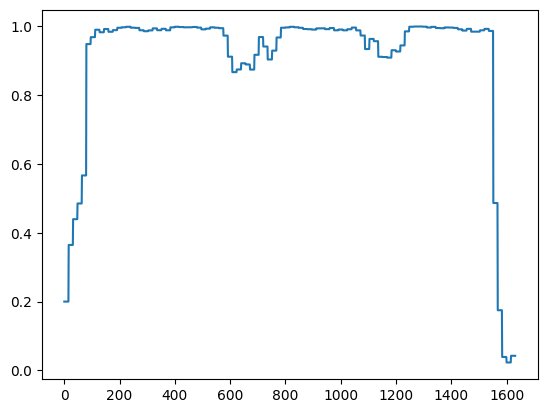

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(rand_x, pred)
plt.show()

In [ ]:
new_folder = '/content/test_video_pred_npy_folder'
os.mkdir(new_folder)
print(glob.glob(new_folder))

['/content/test_video_pred_npy_folder']


In [ ]:
os.chdir('/content/test_video_pred_npy_folder')
import numpy as np
np.save('pred_cut_40-4_cam01_fight01_place01_night_spring.npy', pred)

# [new video] save test video predicted npy files

In [ ]:
import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

UTF-8


In [ ]:
!zip -r /content/drive/MyDrive/test_video_pred_ucfcrime_npy.zip /content/test_video_pred_npy_folder

  adding: content/test_video_pred_npy_folder/ (stored 0%)
  adding: content/test_video_pred_npy_folder/Normal_Videos_345_x264.npy (deflated 85%)
  adding: content/test_video_pred_npy_folder/Assault006_x264.npy (deflated 93%)
  adding: content/test_video_pred_npy_folder/Fighting042_x264.npy (deflated 92%)
  adding: content/test_video_pred_npy_folder/Robbery102_x264.npy (deflated 92%)


In [ ]:
import numpy as np
from sklearn.metrics import auc, roc_curve, precision_recall_curve
# viz.plot_lines('[test]auc', rec_auc)
# rec_auc = auc(fpr, tpr)
tpr = np.load('/content/RTFM/RTFM/tpr.npy')
fpr = np.load('/content/RTFM/RTFM/fpr.npy')
rec_auc = auc(fpr, tpr)
rec_auc

0.5165386965604211